<div style="display: flex; justify-content: center;">
    <div style="background-color: #f4f6f7; padding: 15px; width: 80%;">
        <table style="width: 100%">
            <tr>
                <td style="vertical-align: middle;">
                    <span style="font-size: 14px;">
                        This is an extension notebook for <a href="https://www.thelmbook.com" target="_blank" rel="noopener">The Hundred-Page Language Models Book</a> by Andriy Burkov<br><br>
                        Code repository: <a href="https://github.com/aburkov/theLMbook" target="_blank" rel="noopener">https://github.com/aburkov/theLMbook</a>
                    </span>
                </td>
                <td style="vertical-align: middle;">
                    <a href="https://www.thelmbook.com" target="_blank" rel="noopener">
                        <img src="https://thelmbook.com/img/book.png" width="80px" alt="The Hundred-Page Language Models Book">
                    </a>
                </td>
            </tr>
        </table>
    </div>
</div>

In [ ]:
#NOTE: This code was tested for AWS Sagemaker . Since there are lot of Colab Notebook is available including the one from the Author, wanted to 
# test in AWS. 

In [ ]:
# This POC is to train smaller LLMs like QWEN 0.5, 1.5B, Quantized versions and finetune with GRPO so that it can learn to
# Reason like Deepseek R1 and provide reasoning along with the response.. 

In [1]:
!nvidia-smi


Fri Mar 14 09:24:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10G                    On  |   00000000:00:1E.0 Off |                    0 |
|  0%   25C    P0             58W /  300W |    4261MiB /  23028MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!kill -9 21993                                                                                    
!kill -9 23536                                                                                          
!kill -9 28305                                                                                          
                                          
      

In [1]:
!ls -l /usr/local/ | grep cuda


lrwxrwxrwx  1 root root   20 Mar  7 10:56 cuda -> /usr/local/cuda-12.4
drwxr-xr-x 19 root root 4096 Mar  7 10:56 cuda-12.4


In [2]:
!ls -lh /usr/local/cuda*


lrwxrwxrwx  1 root root   20 Mar  7 10:56 /usr/local/cuda -> /usr/local/cuda-12.4

/usr/local/cuda-12.4:
total 124K
drwxr-xr-x 3 root     root     4.0K Feb 14 03:34 bin
drwxr-xr-x 5 root     root     4.0K Feb 14 03:33 compute-sanitizer
lrwxrwxrwx 1 root     root       20 Mar  7 10:56 cuda-12.4 -> /usr/local/cuda-12.4
-rw-r--r-- 1 root     root      160 Feb 14 03:34 DOCS
drwxr-xr-x 3 root     root       28 Feb 14 03:35 efa
-rw-r--r-- 1 root     root      62K Feb 14 03:34 EULA.txt
drwxr-xr-x 5 root     root       53 Feb 14 03:34 extras
drwxr-xr-x 5 root     root       76 Feb 14 03:33 gds
drwxr-xr-x 2 root     root       40 Feb 14 03:33 gds-12.4
lrwxrwxrwx 1 root     root       28 Feb 14 03:34 include -> targets/x86_64-linux/include
drwxrwxr-x 3 root     root     4.0K Feb 14 03:35 lib
lrwxrwxrwx 1 root     root       24 Feb 14 03:34 lib64 -> targets/x86_64-linux/lib
drwxr-xr-x 7 root     root      209 Feb 14 03:34 libnvvp
-rw-r--r-- 1 ec2-user ec2-user  29K Nov 30  2023 LICENSE
-rw-r--r--

In [5]:
!sudo ln -sf /usr/local/cuda-12.4 /usr/local/cuda


In [6]:
!ls -ld /usr/local/
!ls -ld /usr/local/cuda*

drwxr-xr-x 18 root root 237 Mar  7 10:54 /usr/local/
lrwxrwxrwx  1 root root   20 Mar  7 10:54 /usr/local/cuda -> /usr/local/cuda-12.4
drwxr-xr-x 19 root root 4096 Mar  7 10:39 /usr/local/cuda-12.1
drwxr-xr-x 19 root root 4096 Feb 14 03:23 /usr/local/cuda-12.2
drwxr-xr-x 19 root root 4096 Feb 14 03:29 /usr/local/cuda-12.3
drwxr-xr-x 19 root root 4096 Mar  7 10:56 /usr/local/cuda-12.4


In [7]:
!sudo chmod 777 /usr/local/


In [8]:
!sudo ln -sf /usr/local/cuda-12.4 /usr/local/cuda
!sudo chmod 755 /usr/local/
!sudo rm -rf /usr/local/cuda
!sudo ln -sf /usr/local/cuda-12.4 /usr/local/cuda

In [9]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0


In [10]:
!echo $LD_LIBRARY_PATH


/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/extras/CUPTI/lib64:/usr/local/cuda-11.8/lib:/usr/local/cuda-11.8/efa/lib:/opt/amazon/efa/lib:/opt/amazon/efa/lib64:/opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/opt/amazon/ofi-nccl/lib64:/usr/local/cuda-12.1/lib:/usr/local/cuda-12.1/lib64:/usr/local/cuda-12.1:/usr/local/cuda-12.1/extras/CUPTI/lib64:/usr/local/cuda-12.1/targets/x86_64-linux/lib/:/usr/local/lib:/usr/lib:/lib


In [11]:
!export PATH=/usr/local/cuda-12.4/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-12.4/lib64:$LD_LIBRARY_PATH
!export CUDA_HOME=/usr/local/cuda-12.4

In [12]:
import os

# Set environment variables for Jupyter Notebook
os.environ["PATH"] = "/usr/local/cuda-12.4/bin:" + os.environ["PATH"]
os.environ["LD_LIBRARY_PATH"] = "/usr/local/cuda-12.4/lib64:" + os.environ.get("LD_LIBRARY_PATH", "")
os.environ["CUDA_HOME"] = "/usr/local/cuda-12.4"

# Verify changes
!echo $LD_LIBRARY_PATH
!nvcc --version

/usr/local/cuda-12.4/lib64:/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/extras/CUPTI/lib64:/usr/local/cuda-11.8/lib:/usr/local/cuda-11.8/efa/lib:/opt/amazon/efa/lib:/opt/amazon/efa/lib64:/opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/opt/amazon/ofi-nccl/lib64:/usr/local/cuda-12.1/lib:/usr/local/cuda-12.1/lib64:/usr/local/cuda-12.1:/usr/local/cuda-12.1/extras/CUPTI/lib64:/usr/local/cuda-12.1/targets/x86_64-linux/lib/:/usr/local/lib:/usr/lib:/lib
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0


In [13]:
!ls -l /usr/local/ | grep cuda


lrwxrwxrwx  1 root root   20 Mar  7 10:56 cuda -> /usr/local/cuda-12.4
drwxr-xr-x 19 root root 4096 Mar  7 10:39 cuda-12.1
drwxr-xr-x 19 root root 4096 Feb 14 03:23 cuda-12.2
drwxr-xr-x 19 root root 4096 Feb 14 03:29 cuda-12.3
drwxr-xr-x 19 root root 4096 Mar  7 10:56 cuda-12.4


In [14]:

!sudo rm -rf /usr/local/cuda
!sudo ln -s /usr/local/cuda-12.4 /usr/local/cuda



In [15]:
!echo 'export PATH=/usr/local/cuda/bin:$PATH' >> ~/.bashrc
!echo 'export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH' >> ~/.bashrc
!echo 'export CUDA_HOME=/usr/local/cuda' >> ~/.bashrc
!source ~/.bashrc

In [20]:
!sudo rm -rf /usr/local/cuda-12.1 /usr/local/cuda-12.2 /usr/local/cuda-12.3


In [21]:
!ls -l /usr/local/ | grep cuda


lrwxrwxrwx  1 root root   20 Mar  7 10:56 cuda -> /usr/local/cuda-12.4
drwxr-xr-x 19 root root 4096 Mar  7 10:56 cuda-12.4


In [32]:
# Required
!pip install --upgrade pip setuptools wheel ninja packaging
# Required
!pip install trl

In [33]:
# Required
!pip install ninja 

In [34]:
#Required
#!pip uninstall torch torchvision torchaudio -y
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [35]:
#!pip uninstall -y torch torchvision torchaudio flash-attn -y
#!rm -rf ~/.cache/torch_extensions ~/.cache/pip


In [36]:
#Required
import os
os.environ["TMPDIR"] = os.getcwd()

In [37]:
!pwd

/home/ec2-user/SageMaker/Open_R1_Models/IT_Issue_Resolution


In [38]:
%cd /home/ec2-user/SageMaker/flash-attention

/home/ec2-user/SageMaker/flash-attention


In [39]:
#Required if the clone is not present in locall
#!git clone https://github.com/Dao-AILab/flash-attention.git
#!cd flash-attention

#%cd flash-attention
!pip install . --no-build-isolation --no-cache-dir

Processing /home/ec2-user/SageMaker/flash-attention
  Preparing metadata (setup.py) ... one
  Created wheel for flash_attn: filename=flash_attn-2.7.4.post1-cp310-cp310-linux_x86_64.whl size=187797312 sha256=b267f80a08e516292cdd748056a2178a45b8abedf7fca123292eb17c21c8c87c
  Stored in directory: /home/ec2-user/SageMaker/Open_R1_Models/IT_Issue_Resolution/pip-ephem-wheel-cache-h4cp3t5o/wheels/d3/ed/a2/46a892a92f2f0b658011fa7fc1d0fe4db6da746116d014ccbb
Successfully built flash_attn


In [40]:
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124













Looking in indexes: https://download.pytorch.org/whl/cu124


In [41]:
#Required
#!pip install wandb
#!pip uninstall wandb -y
!pip install wandb==0.19.6

  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 133.3 MB/s eta 0:00:00
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)


In [42]:
#!pip uninstall transformers -y
!pip install transformers

In [43]:
!pip show torch torchvision torchaudio flash-attn transformers ninja transformers wandb


Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, flash_attn, torchaudio, torchvision
---
Name: torchvision
Version: 0.20.1+cu124
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-pa

In [1]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should return your GPU model
print(torch.__version__)  # Should match 2.5.1+cu124
print(torch.cuda.is_available())  # Should be True
print(torch.cuda.get_device_name(0))  # Should show your GPU model
print(torch.__file__)  # Shows where PyTorch is installed

True
NVIDIA A10G
2.5.1+cu124
True
NVIDIA A10G
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/__init__.py


In [23]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24987 sha256=ef14b8f5674031bb1150842986e4c10874ce6e0e879a3447dafb13d6e6a98015
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [117]:
!pip install bert-score


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [2]:
import torch
print(torch.version.cuda)


12.4


In [3]:
!nvidia-smi

Fri Mar  7 11:11:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10G                    On  |   00000000:00:1E.0 Off |                    0 |
|  0%   18C    P8             15W /  300W |       4MiB /  23028MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#ls -l /usr/local/cuda/lib64/libnvJitLink.so.12


In [5]:
!ls -l /usr/local/ | grep cuda


lrwxrwxrwx  1 root root   20 Mar  7 10:56 cuda -> /usr/local/cuda-12.4
drwxr-xr-x 19 root root 4096 Mar  7 10:56 cuda-12.4


In [6]:
#!cat /usr/local/cuda-12.4

In [8]:
import torch
print(torch.version.cuda)

12.4


In [9]:
#!pip install flash-attn


In [10]:
#%cd ..

In [11]:
!pwd

/home/ec2-user/SageMaker/Open_R1_Models/IT_Issue_Resolution


# Reinforcement Learning Pipeline for a Language Model

In this tutorial, we demonstrate how to build a reinforcement learning (RL) pipeline using the GRPO (Group Relative Policy Optimization) method to finetune a language model for math, logic, and coding tasks. These are tasks for which there exist a unique correct answer that can be easily verified with the ground truth answer using a simple string comparison.

GRPO was used the DeepSeek R1 and R1-Zero models. You will find a detailed overview of GRPO and how R1 and R1-Zero were trained in [this article](https://thelmbook.com/articles/#!./DeepSeek-R1.md).

Our objective of this tutorial is to transform a generalist language model into a math problem solver. We integrate several popular libraries and tools, including:

- **PyTorch:** For tensor operations and deep learning.
- **Hugging Face Transformers:** For loading pre-trained language models and tokenizers.
- **TRL (Transformer Reinforcement Learning):** For configuring and running the GRPO training loop.
- **FlashAttention2:** For optimized attention mechanisms that help reduce memory usage and improve training speed.
- **Weights & Biases (wandb):** For experiment tracking, visualization, and model versioning.

The tutorial is organized into several parts. We start with the basic setup and imports, then move on to data formatting and answer extraction, dataset preparation, evaluation functions, reward functions, training setup and execution, and finally loading and testing the model.

## Part 1: Basic Setup and Imports

In this first part, we install and import all necessary modules. We also set up our environment by configuring random seeds for reproducibility and initializing environment variables required for experiment tracking. In addition, we install and import libraries that provide optimized transformer attention mechanisms (FlashAttention2) and specialized RL tools (TRL):

In [1]:
import torch
import torch.nn.functional as F
import random
import copy
import functools  # Ensure functools is imported
import csv


def selective_log_softmax(logits, input_ids):
    """
    Compute the log probabilities for the tokens specified in input_ids using a selective log-softmax.

    Args:
        logits (torch.Tensor): A tensor of shape (batch_size, seq_len, vocab_size) containing raw logits from the model.
        input_ids (torch.Tensor): A tensor of shape (batch_size, seq_len) containing the token indices for which we want the log probabilities.

    Returns:
        torch.Tensor: A tensor of shape (batch_size, seq_len) where each element is the log probability
                      corresponding to the token in input_ids at that position.

    Explanation:
        1. F.log_softmax is applied along the vocabulary dimension (dim=-1) to convert logits into log probabilities.
        2. The tensor input_ids is reshaped (via unsqueeze) to have an extra dimension so that we can use it as indices
           in the log_probs tensor.
        3. torch.gather collects the log probability at the index specified in input_ids for each position.
        4. Finally, squeeze(-1) removes the extra dimension, returning a tensor with the same shape as input_ids.
    """
    # Convert raw logits into log probabilities along the vocabulary axis.
    log_probs = F.log_softmax(logits, dim=-1)  # Shape: (batch_size, seq_len, vocab_size)

    # Reshape input_ids from (batch_size, seq_len) to (batch_size, seq_len, 1) for gathering.
    # Then, gather the log probability for each token in input_ids.
    selected_log_probs = log_probs.gather(dim=-1, index=input_ids.unsqueeze(-1))

    # Remove the extra last dimension to get back to shape (batch_size, seq_len).
    return selected_log_probs.squeeze(-1)

def compute_log_probs(model, input_ids, attention_mask, logits_to_keep):
    """
    Compute per-token log probabilities for a subset of tokens (typically the completion tokens).

    Args:
        model: The language model to use.
        input_ids (torch.Tensor): Tensor of shape (batch_size, total_seq_len) containing token ids
                                  for both prompt and completion.
        attention_mask (torch.Tensor): Tensor of shape (batch_size, total_seq_len) indicating which tokens are real (1) or padding (0).
        logits_to_keep (int): Number of tokens (from the completion part) for which we need log probabilities.

    Returns:
        torch.Tensor: Log probabilities for the last `logits_to_keep` tokens of each sequence.

    Explanation:
        1. We call the model with logits_to_keep + 1 so that the model outputs one extra logit than needed.
           This is common in next-token prediction setups.
        2. We slice off the last logit along the sequence dimension because it does not correspond to any input token.
        3. We then restrict both the input_ids and logits to the last logits_to_keep tokens, which should
           correspond to the generated completion portion.
        4. Finally, we use the selective_log_softmax to compute log probabilities only for those tokens.
    """
    # Run the model forward pass and obtain logits.
    logits = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        logits_to_keep=logits_to_keep + 1  # Request one extra logit for proper alignment.
    ).logits  # Shape: (batch_size, total_seq_len, vocab_size)

    # Remove the last logit as it does not have a corresponding target token.
    logits = logits[:, :-1, :]  # New shape: (batch_size, total_seq_len - 1, vocab_size)

    # Slice the input_ids to keep only the last logits_to_keep tokens.
    # This corresponds to the generated completion tokens.
    input_ids = input_ids[:, -logits_to_keep:]  # Shape: (batch_size, logits_to_keep)

    # Also slice the logits to keep only those corresponding to the completion tokens.
    logits = logits[:, -logits_to_keep:, :]  # Shape: (batch_size, logits_to_keep, vocab_size)

    # Compute and return the log probabilities for the selected tokens.
    return selective_log_softmax(logits, input_ids)

def create_completion_mask(completion_ids, eos_token_id):
    """
    Create a binary mask for the generated completion tokens so that tokens after the first EOS are ignored.

    Args:
        completion_ids (torch.Tensor): Tensor of shape (batch_size, seq_len) with generated token ids.
        eos_token_id (int): The token id representing the end-of-sequence.

    Returns:
        torch.Tensor: A mask tensor of shape (batch_size, seq_len) with 1s for tokens up to and including the first EOS
                      and 0s for tokens following the first EOS.

    Explanation:
        1. First, a boolean mask (is_eos) is created indicating where in the sequence the EOS token appears.
        2. An index tensor (eos_idx) is initialized, assuming that no EOS is found (defaulting to the sequence length).
        3. For sequences where EOS exists, eos_idx is updated to the position (index) of the first EOS.
        4. A sequence index tensor is created that contains indices for each position in the sequence.
        5. The final mask is computed by comparing the sequence indices to eos_idx (after adding a dimension).
    """
    # Determine which positions in each sequence equal the EOS token.
    is_eos = completion_ids == eos_token_id  # Boolean tensor of shape (batch_size, seq_len)

    # Initialize a tensor to store the index of the first EOS for each sequence.
    # If no EOS is found, default to the full sequence length (is_eos.size(1)).
    eos_idx = torch.full((is_eos.size(0),), is_eos.size(1), dtype=torch.long, device=completion_ids.device)

    # Identify sequences that contain at least one EOS.
    mask_exists = is_eos.any(dim=1)
    # For sequences with an EOS, update eos_idx to the index of the first occurrence.
    eos_idx[mask_exists] = is_eos.int().argmax(dim=1)[mask_exists]

    # Create a tensor of indices [0, 1, 2, ..., seq_len-1] and replicate it for each sequence in the batch.
    sequence_indices = torch.arange(is_eos.size(1), device=completion_ids.device).expand(is_eos.size(0), -1)

    # Build the mask: positions with an index less than or equal to the first EOS index are marked as 1.
    completion_mask = (sequence_indices <= eos_idx.unsqueeze(1)).int()

    return completion_mask

def generate_completions(model, tokenizer, prompts, num_generations=4, max_completion_length=32):
    """
    Generate multiple completions for each prompt and create corresponding attention masks.

    Args:
        model: The language model used for generation.
        tokenizer: The tokenizer to process the prompts and decode the outputs.
        prompts (list of str): List of input prompt strings.
        num_generations (int): Number of completions to generate per prompt.
        max_completion_length (int): Maximum number of new tokens to generate for the completion.

    Returns:
        tuple: Contains the following tensors:
            - prompt_ids: (batch_size * num_generations, prompt_seq_len)
            - prompt_mask: (batch_size * num_generations, prompt_seq_len)
            - completion_ids: (batch_size * num_generations, completion_seq_len)
            - completion_mask: (batch_size * num_generations, completion_seq_len)

    Explanation:
        1. The prompts are tokenized and padded (with padding added to the left).
        2. Each prompt is repeated num_generations times so that multiple completions are generated per prompt.
        3. The model.generate() function is called to generate new tokens.
        4. The generated output contains the prompt followed by the completion; we remove the prompt part to get the completions.
        5. A mask is created (via create_completion_mask) so that only tokens up to the first EOS are considered.
    """
    device = next(model.parameters()).device

    # Tokenize the list of prompts with padding. The padding_side="left" ensures alignment on the right.
    inputs = tokenizer(prompts, return_tensors="pt", padding=True, padding_side="left")
    prompt_ids = inputs["input_ids"].to(device)      # Shape: (batch_size, prompt_seq_len)
    prompt_mask = inputs["attention_mask"].to(device)  # Shape: (batch_size, prompt_seq_len)
    prompt_length = prompt_ids.size(1)  # Save the prompt length to later separate prompt from completion.

    # Repeat each prompt num_generations times.
    prompt_ids = prompt_ids.repeat_interleave(num_generations, dim=0)   # New shape: (batch_size*num_generations, prompt_seq_len)
    prompt_mask = prompt_mask.repeat_interleave(num_generations, dim=0) # New shape: (batch_size*num_generations, prompt_seq_len)

    # Generate new tokens for each prompt. The output includes the original prompt and the generated tokens.
    outputs = model.generate(
        prompt_ids,
        attention_mask=prompt_mask,
        max_new_tokens=max_completion_length,
        do_sample=True,
        temperature=1.0,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

    # Remove the prompt portion from the generated output to isolate the completion tokens.
    completion_ids = outputs[:, prompt_length:]  # Shape: (batch_size*num_generations, completion_seq_len)

    # Create a binary mask that ignores tokens beyond the first EOS token.
    completion_mask = create_completion_mask(completion_ids, tokenizer.eos_token_id)

    return prompt_ids, prompt_mask, completion_ids, completion_mask

def grpo_loss(model, ref_model, tokenizer, batch_samples, reward_function,
              beta=0.1, num_generations=4, max_completion_length=32):
    """
    Compute the GRPO loss, which combines a policy gradient loss with a KL divergence penalty.

    Args:
        model: The current language model (policy).
        ref_model: The reference model (baseline) used for computing KL divergence.
        tokenizer: The tokenizer for decoding completions.
        batch_samples (list): A list of samples, where each sample contains at least a "prompt" and an "answer".
        reward_function: A function that takes prompts, completions, and answers and returns a list of reward values.
        beta (float): Weight for the KL divergence term.
        num_generations (int): Number of completions generated per prompt.
        max_completion_length (int): Maximum token length for each generated completion.

    Returns:
        torch.Tensor: A scalar loss tensor.

    Explanation:
        1. Extract prompts from the batch samples.
        2. Generate multiple completions per prompt.
        3. Concatenate the prompt and completion tokens to form the full sequence.
        4. Compute the log probabilities (for the completion part) using both the current model and the reference model.
        5. Format the generated completions into text for reward evaluation.
        6. Compute a reward for each completion and then normalize them (compute advantages) per group.
        7. Compute the per-token KL divergence between the reference and current model's log probabilities.
        8. Combine the policy loss and KL divergence to compute the final loss.
    """
    device = next(model.parameters()).device

    # Extract the prompt text from each sample.
    prompts = [sample["prompt"] if isinstance(sample, dict) else sample[0] for sample in batch_samples]

    # Generate completions and obtain their masks.
    prompt_ids, prompt_mask, completion_ids, completion_mask = generate_completions(
        model, tokenizer, prompts, num_generations, max_completion_length
    )

    # Concatenate prompt and completion tokens to form the full input sequence.
    input_ids = torch.cat([prompt_ids, completion_ids], dim=1)
    attention_mask = torch.cat([prompt_mask, completion_mask], dim=1)

    # Only compute log probabilities for the completion part.
    logits_to_keep = completion_ids.size(1)

    # Compute log probabilities for the completion tokens using the reference model.
    # Use torch.no_grad() because gradients should not flow through the reference model.
    with torch.no_grad():
        ref_token_log_probs = compute_log_probs(ref_model, input_ids, attention_mask, logits_to_keep)

    # Compute log probabilities for the completion tokens using the current model.
    token_log_probs = compute_log_probs(model, input_ids, attention_mask, logits_to_keep)

    # Decode the completion tokens into text for reward evaluation.
    # Each decoded completion is wrapped in a dictionary (for compatibility with some reward functions).
    formatted_completions = [
        [{'content': tokenizer.decode(ids, skip_special_tokens=True)}]
        for ids in completion_ids
    ]
    # Repeat each prompt for each generated completion.
    repeated_prompts = [p for p in prompts for _ in range(num_generations)]
    # Extract answers from the batch and repeat each for the corresponding number of generations.
    answers = [sample["answer"] if isinstance(sample, dict) else sample[1]
               for sample in batch_samples for _ in range(num_generations)]

    # Compute rewards using the reward_function.
    rewards = torch.tensor(
        reward_function(prompts=repeated_prompts, completions=formatted_completions, answer=answers),
        dtype=torch.float32,
        device=device
    )

    # For monitoring, print the average reward.
    avg_reward = rewards.mean().item()
    print("Average Reward:", avg_reward)

    # Reshape rewards to group completions by prompt.
    # Compute mean and standard deviation for each prompt group.
    mean_rewards = rewards.view(-1, num_generations).mean(dim=1)
    std_rewards = rewards.view(-1, num_generations).std(dim=1)
    # Expand the means and stds to match the original flat rewards tensor shape.
    mean_rewards = mean_rewards.repeat_interleave(num_generations, dim=0)
    std_rewards = std_rewards.repeat_interleave(num_generations, dim=0)
    # Normalize rewards to get advantages.
    advantages = (rewards - mean_rewards) / (std_rewards + 1e-4)

    # Compute per-token KL divergence between reference and current model log probabilities.
    per_token_kl = torch.exp(ref_token_log_probs - token_log_probs) - (ref_token_log_probs - token_log_probs) - 1

    # Compute the policy gradient loss component.
    # The term token_log_probs.detach() prevents gradients from flowing into the baseline.
    per_token_loss = torch.exp(token_log_probs - token_log_probs.detach()) * advantages.unsqueeze(1)
    # Combine the loss with the KL penalty (weighted by beta) and take the negative.
    per_token_loss = -(per_token_loss - beta * per_token_kl)

    # Apply the completion mask to compute the average loss per sequence:
    # - Multiply the loss by the mask so that only valid tokens contribute.
    # - Sum the loss per sequence and divide by the number of valid tokens.
    # - Finally, average over all sequences.
    loss = ((per_token_loss * completion_mask).sum(dim=1) / completion_mask.sum(dim=1)).mean()

    return loss

def train_with_grpo(model, tokenizer, train_data, num_steps=500, batch_size=4,
                    num_generations=4, max_completion_length=128, beta=0.1,
                    learning_rate=5e-6):
    """
    Fine-tune the model using the GRPO algorithm.

    This function implements a training loop that:
      1. Creates a reference model (a deep copy of the current model) whose parameters are frozen.
      2. For each training step:
           - Samples a batch of training samples.
           - Generates multiple completions per prompt.
           - Computes the GRPO loss (which combines a policy gradient term based on advantages and a KL divergence
             penalty between the current model and the reference model).
           - Performs backpropagation and updates the model parameters.
           - Updates the reference model to match the current model.

    Args:
        model: The language model to be fine-tuned.
        tokenizer: The tokenizer used for encoding prompts and decoding completions.
        train_data (list): List of training samples; each sample contains at least a "prompt" and an "answer".
        num_steps (int): Total number of training steps.
        batch_size (int): Number of samples to process per training step.
        num_generations (int): Number of completions to generate per prompt.
        max_completion_length (int): Maximum number of tokens to generate for each completion.
        beta (float): Weight of the KL-divergence penalty term in the loss.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        The fine-tuned model.
    """
    # Determine the device (CPU or GPU) where the model's parameters reside.
    device = next(model.parameters()).device

    # Create a reference model by making a deep copy of the current model.
    # The reference model is used for computing the KL divergence and is not updated via gradients.
    ref_model = copy.deepcopy(model)
    for param in ref_model.parameters():
        param.requires_grad = False

    # Initialize the Adam optimizer with the provided learning rate.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Set the model to training mode (this enables dropout, etc.).
    model.train()

    # Counter to track the number of examples processed (for logging purposes).
    examples_processed = 0

    # Training loop: iterate for the specified number of training steps.
    for step in range(num_steps):
        # Randomly sample a batch of training samples from train_data.
        # Each sample is expected to be a dict (or tuple) containing at least "prompt" and "answer".
        batch_samples = random.sample(train_data, batch_size)

        # Compute the GRPO loss for the current batch.
        # The grpo_loss function performs several operations:
        #   - Extracts prompts from the batch.
        #   - Generates multiple completions per prompt.
        #   - Concatenates the prompt tokens with the generated tokens.
        #   - Computes per-token log probabilities for both the current model and the reference model.
        #   - Decodes the completions and computes rewards via a reward function.
        #   - Normalizes rewards within each prompt group (computing advantages).
        #   - Computes a per-token KL divergence between the current model and the reference model.
        #   - Combines the policy gradient loss and KL penalty into a final scalar loss.
        loss = grpo_loss(
            model,            # The current model (policy) being fine-tuned.
            ref_model,        # The reference model used for KL divergence computation.
            tokenizer,        # The tokenizer for encoding and decoding text.
            batch_samples,    # The current batch of training samples.
            combined_reward,  # The reward function (must be defined elsewhere) that returns a list of rewards.
            beta=beta,        # The KL divergence weight.
            num_generations=num_generations,
            max_completion_length=max_completion_length
        )

        # Backpropagation and parameter update:
        optimizer.zero_grad()           # Clear previous gradients.
        loss.backward()                 # Compute gradients via backpropagation.
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)  # Optionally clip gradients to prevent exploding gradients.
        optimizer.step()                # Update the model's parameters.

        # Update the reference model so that it matches the current model after this update.
        ref_model.load_state_dict(model.state_dict())

        # Log the loss every 5 steps to monitor training progress.
        if step % 5 == 0:
            print(f"Step {step}/{num_steps}, loss: {loss.item():.4f}")

        # Update the counter for processed examples.
        examples_processed += batch_size

        # Clear the GPU cache to help with memory management.
        torch.cuda.empty_cache()

    # Return the fine-tuned model after completing all training steps.
    return model

In [2]:
#################################################

In [5]:
import numpy as np
import random
import torch
def set_random_seed(seed: int = 42):
    """
    Set the random seed for reproducibility across Python, NumPy, and PyTorch.

    Parameters:
        seed (int): The seed value to use.
    """
    # Set the seed for Python's built-in random module
    random.seed(seed)

    # Set the seed for NumPy
    np.random.seed(seed)

    # Set the seed for PyTorch
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    # Ensure deterministic behavior in cuDNN (may impact performance)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_random_seed(42)

import os
os.environ["WANDB_API_KEY"] = "a4629089fec64edac461d6bf4b97aba623abfb19"
os.environ["WANDB_PROJECT"] = "GRPO-Qwen-0.5-Instruct-AWS-IT_Issue_Resolution-3"

!wandb login
#!pip install flash-attn
#!pip install trl

import os
import hashlib
import tarfile
import requests
import re
import wandb
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling, TrainerCallback, PreTrainedTokenizerBase
from trl import GRPOConfig, GRPOTrainer

wandb: Currently logged in as: rajesh-thanaseelan to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


The code above performs the following tasks:

- **Setting a random seed:** The `set_random_seed` function ensures reproducibility by setting the seed for Python's random module, NumPy, and PyTorch. It also configures PyTorch's cuDNN backend for deterministic behavior.
- **Environment variable configuration:** We set the `WANDB_API_KEY` and `WANDB_PROJECT` environment variables to enable experiment tracking with Weights & Biases.
- **Installation and import of additional packages:** The commands to log into wandb and install `flash-attn` and `trl` are executed. (`flash-attn` must be installed before `trl`). Then, the script imports all the necessary modules for the pipeline, including those for handling datasets, tokenization, model loading, and training.

Below is a detailed explanation of what each import is for:

- **wandb:** Enables experiment tracking, visualization, and model versioning through Weights & Biases.
- **flash-attn:** Provides optimized attention mechanisms for transformer models, reducing memory usage and improving training speed.
- **trl:** Offers tools specifically designed for fine-tuning language models with reinforcement learning.
- **torch:** Provides GPU-accelerated tensor operations and deep learning primitives.
- **random:** Helps with dataset shuffling and random operations.
- **os:** Handles operating system operations like file paths and environment variables.
- **re:** Provides regular expression support for text processing.
- **load_dataset:** Loads datasets (such as GSM8K) from Hugging Face's datasets library.
- **AutoTokenizer** & **AutoModelForCausalLM:** Load pre-trained language models and their tokenizers.
- **Trainer** & **TrainingArguments** Provide high-level interfaces for setting up and running the SFT training loop.
- **TrainerCallback:** Enables custom callback functions during training.
- **GRPOConfig** & **GRPOTrainer:** Provide high-level interfaces for setting up and running the GRPO training loop.

## Part 2: Data Formatting and Answer Extraction

In this section, we define how our data is formatted and how to extract the answer segments from both the model's output and the dataset. To ensure that the model outputs its response in a consistent format, we define a system prompt. The prompt instructs the model to generate output in an XML-like format containing `<reasoning>` and `<answer>` tags. We then provide two functions:

1. **`extract_answer_from_model_output`:** This function takes the model’s output text and extracts the content within the `<answer>` tags.
2. **`extract_answer_from_dataset`:** This function extracts the expected answer from the GSM8K dataset, which separates the answer using the `"####"` delimiter:

In [6]:
SYSTEM_PROMPT = """
Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
"""

def extract_answer_from_model_output(text):
    """
    Extracts the value from the last <answer> tag in the text.
    Returns None if no valid answer is found.
    """
    # Split on <answer> and take everything after the last occurrence
    parts = text.split("<answer>")
    if len(parts) < 2:  # No <answer> tag found
        return None

    last_part = parts[-1]

    # Extract content up to </answer>
    if "</answer>" not in last_part:
        return None

    answer = last_part.split("</answer>")[0].strip()
    return None if answer == "..." else answer

def extract_answer_from_dataset(text):
    """
    Extracts the answer from the dataset.
    The dataset separates the answer using the '####' delimiter.
    """
    if "####" not in text:
        return None
    return text.split("####")[1].strip()

In the above code:

- **`SYSTEM_PROMPT`:** This string variable instructs the model to respond with its chain-of-thought in the `<reasoning>` tag and the final answer in the `<answer>` tag. The use of this consistent format makes it easier to extract and evaluate the answer.
- **`extract_answer_from_model_output`:** This function splits the generated text by the `<answer>` tag, ensuring that only the content within the last occurrence of the tag is extracted. If the tag is missing or the answer is not valid (for example, it is a placeholder `"..."`), the function returns `None`.
- **`extract_answer_from_dataset`:** Given that the GSM8K dataset separates the answer using a delimiter (`"####"`), this function extracts the expected answer by splitting the text on that delimiter.

## Part 3: Dataset Preparation

In this part we prepare the GSM8K dataset for training. GSM8K is a dataset of 8.5K high quality linguistically diverse grade school math word problems created by human problem writers. We will use the examples from this dataset to train our model in the reinforcement learning (RL) paradigm: the model will generate several sample probelem solutions, we will compare these solutions to the ground truth number from a GSM8K example and, if there's a match, we will provide a high reward to the RL algorithm (GRPO) which will update the model's weights so that the chance of getting the high reward next time is increased.

We first load the dataset from Hugging Face and then format each example to include a system prompt and a user prompt. We also extract the expected answer from the dataset. Two helper functions are defined here:

1. **`prepare_dataset`:** Loads and prepares the GSM8K dataset by creating a prompt that includes a system prompt (with the formatting instructions) and a user message (the question). It also extracts the answer from the dataset.
2. **`build_prompt`:** Concatenates the list of message dictionaries into a single prompt string. This ensures consistency in how the prompt is constructed during both training and inference.
3. **`ChatDataCollator`** is used in supervised fine-tuning (SFT) to concatenate chat messages into a fixed, padded sequence suitable for training.

In [7]:
def prepare_dataset_new(split="train",model_name=None):
    """Load and prepare the GSM8K dataset for training."""
    data = load_dataset('openai/gsm8k', 'main')[split]

     # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token
    #tokenizer.padding_side = "left"

    #global tokenizer  # Ensure we are modifying the correct tokenizer
    
    # ✅ Ensure Left Padding for Flash Attention
    tokenizer.padding_side = "left"
    
    formatted_data = []

    for example in data:
        formatted_example = {
            "prompt": [
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": example["question"]}
            ],
            "answer": extract_answer_from_dataset(example["answer"])
        }
        formatted_data.append(formatted_example)

    # Extract text content from "prompt"
    text_inputs = [
        "\n".join([msg["content"] for msg in ex["prompt"]])  # Merge system and user messages into a single string
        for ex in formatted_data
    ]

    # Tokenize input texts but store the original structure
    tokenized_inputs = tokenizer(
        text_inputs,  # Tokenize user/system messages
        padding=True,  # Ensures correct padding
        truncation=True,
        return_tensors="pt",
    )

    # Convert tokenized tensors into a format compatible with GRPOTrainer
    for i, ex in enumerate(formatted_data):
        ex["tokenized_prompt"] = {key: val[i] for key, val in tokenized_inputs.items()}  # Add tokenized data
        ex["tokenized_answer"] = tokenizer(
            ex["answer"], padding=True, truncation=True, return_tensors="pt"
        )  # Tokenize answer separately

    return formatted_data  # Return a list of dictionaries

In [8]:
def prepare_dataset(split="train"):
    """Load and prepare the GSM8K dataset for training."""
    data = load_dataset('openai/gsm8k', 'main')[split]
    formatted_data = []

    for example in data:
        formatted_example = {
            "prompt": [
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": example["question"]}
            ],
            "answer": extract_answer_from_dataset(example["answer"])
        }
        formatted_data.append(formatted_example)

    return formatted_data

def build_prompt(messages):
    """
    Build a single prompt string from a list of messages.
    Each message is expected to be a dictionary with 'role' and 'content' keys.
    This function concatenates all message contents, preserving the training format.
    """
    return "\n".join([msg["content"].strip() for msg in messages])

class ChatDataCollator:
    def __init__(self, tokenizer: PreTrainedTokenizerBase, max_length: int = 512):
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __call__(self, batch):
        inputs = []
        labels = []
        for example in batch:
            # Here we assume the last message is the target (assistant's output)
            prompt = build_prompt(example["messages"][:-1])
            target = example["messages"][-1]["content"]

            # Concatenate prompt and target (add a newline between them)
            full_text = prompt + "\n" + target
            tokenized = self.tokenizer(full_text, truncation=True, max_length=self.max_length)
            input_ids = torch.tensor(tokenized["input_ids"])
            inputs.append(input_ids)
            # You can choose to set labels equal to input_ids, or modify as needed.
            labels.append(input_ids)

        inputs_padded = pad_sequence(inputs, batch_first=True, padding_value=self.tokenizer.pad_token_id)
        labels_padded = pad_sequence(labels, batch_first=True, padding_value=-100)
        return {"input_ids": inputs_padded, "labels": labels_padded}

In [ ]:
# Load  dataset

from datasets import load_dataset

# Path to your JSON file
json_file_path = "it_issues_dataset_8000.json"  # Update with your actual path

# Load dataset from local JSON file
botseeker_dataset = load_dataset("json", data_files=json_file_path)
botseeker_dataset = [dict(record) for record in botseeker_dataset['train']]


# Check dataset structure
print(botseeker_dataset[0])

{'prompt': [{'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'VPN disconnects intermittently.', 'role': 'user'}], 'answer': 'Optimized VPN server settings.'}


In [10]:
# SFT Dataset
# Path to your JSON file
json_file_path = "sft_it_issues_dataset_4000.json"  # Update with your actual path

# Load dataset from local JSON file
sft_botseeker_dataset = load_dataset("json", data_files=json_file_path)
sft_botseeker_dataset = [dict(record) for record in sft_botseeker_dataset['train']]


# Check dataset structure
print(sft_botseeker_dataset[0])

{'messages': [{'content': '\nRespond in the following format:\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'Cloud storage uploads failing intermittently.', 'role': 'user'}, {'content': "<reasoning>\nAlright, we have an issue: Cloud storage uploads failing intermittently.. Let me first try accessing the affected server `CACHE-SRV03`..\nConnected to `CACHE-SRV03`. Now, let me check if the `haproxy` service is running..\nRunning `systemctl status haproxy`.. Hmm, I don’t see it running. That’s not good..\nLet me check the logs in `/var/log/syslog` for any errors..\nLooking through `/var/log/syslog`, I see an error: `S3 bucket permission issue`. That’s likely the culprit!\nAlright, I’m going to try restarting `haproxy` to see if it recovers..\nRunning `systemctl restart haproxy`.. Done! Now, let’s check if it's running..\nChecking `systemctl status haproxy` again.. Nice! It’s up and running.\nLet’s do a final validation by tailing the logs in 

The problem with finetuning a model as small as Qwen-0.5B-Instruct is that it's too small to consistently follow out instruction given in the system proimpt to generate the `<reasoning>` and `<answer>` tags. Without these tags, we cannot generate the reward for giving the right answer. We need to help the model a little bit in the beginning. For this, I generated a dataset of Chain-of-Thought (CoT) sequences for some of the `gsm8k` examples. We will use 500 of them to finetune the model in a supervised (SFT) way to teach it using `<reasoning>` and `<answer>` tags before we apply the reinforcement learning.

To achieve that, we add functions to download and extract the CoT file and to prepare an SFT dataset. In this case, we generate SFT examples by reading CoT outputs from the archive. The filename for each example is determined by the SHA-256 hash of the corresponding `gsm8k` question.

Doing this supervised finetuning step isn't mandatory, but it will accelerate the reinforcemement learning step because more answers generated by the model will have the `<reasoning>` and `<answer>` tag which will result in more reinformcement steps in positive reward starting from the very early steps, where the model is the less capable.

Also, for relatively "dumb" models like Qwen-0.5-Instruct, not doing the preliminary SFT will most likely result in model not learning at all because it never generates the answer inside the `<answer>` tag.

In this code:

- **`download_and_extract_cot_archive`:** Downloads a tar.gz archive containing Chain-of-Thought (CoT) files and extracts it if it has not been previously extracted. This ensures that the CoT files are available locally.
- **`prepare_sft_dataset`:** Prepares a supervised fine-tuning dataset using 500 examples. For each example in the GSM8K training set, it calculates a SHA-256 hash of the question to determine the filename of the corresponding CoT output. If the file exists, the CoT output is read and formatted as a chat-style example with system, user, and assistant messages.

## Part 4: Evaluation Functions

Evaluation is crucial to track the model's progress. In this part, we define functions that allow us to evaluate the model on a set of examples. The evaluation functions perform the following tasks:

- **Tokenize the prompt and generate a response:** The model's output is generated given the tokenized prompt.
- **Extract the predicted answer:** The answer is extracted from the generated response.
- **Compare the predicted answer with the expected answer:** This comparison is done using exact matching as well as numeric equivalence checks.

Two helper functions, `_extract_last_number` and `_extract_single_number`, are used to extract numbers from text. The main evaluation function, `evaluate_model`, uses these helpers to determine if the predicted answer is correct:

In [11]:
def _extract_last_number(text):
    """
    Extracts the last number from text if it's properly separated.
    The number must be at the end and separated by space or = sign.
    Ignores $ and % signs.
    Returns None if no valid number is found.
    """
    import re

    # Remove $ and % signs
    text = text.replace('$', '').replace('%', '')

    # Look for numbers that are:
    # - preceded by space or = or start of string (via \b or ^)
    # - followed by end of string or space
    pattern = r'(?:^|\s|=)\s*(-?\d*\.?\d+)\s*$'
    match = re.search(pattern, text)
    return float(match.group(1)) if match else None

def _extract_single_number(text):
    """
    Extracts a single number from text if exactly one exists,
    otherwise returns None.
    """
    import re
    numbers = re.findall(r'-?\d*\.?\d+', text)
    return float(numbers[0]) if len(numbers) == 1 else None

def evaluate_model(model, tokenizer, eval_examples, device):
    """Evaluates the model on a set of examples and prints detailed results."""
    model.eval()
    correct = 0
    total = len(eval_examples)
    print("\n" + "="*50)
    print("EVALUATION ON", total, "EXAMPLES")
    print("="*50)
    for example in eval_examples:
        # Build the full prompt using the same method as training.

        print("example[prompt]", example["prompt"])
        
        full_prompt = build_prompt(example["prompt"])

        print("full_prompt[prompt]", full_prompt)

        #full_prompt=example["prompt"]
        expected = example["answer"]
        # Tokenize the full prompt and generate a response from the model.
        inputs = tokenizer.encode(full_prompt, return_tensors="pt").to(device)
        outputs = model.generate(
            inputs,
            max_length=512,
            temperature=0.7,
            num_return_sequences=1
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        # Extract the predicted answer from the model output.
        try:
            predicted = extract_answer_from_model_output(response)

            from evaluate import load
            bertscore = load("bertscore")
            predictions = [predicted]
            references = [expected]
            results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
            print(results)
            # Extract F1 score up to 2 decimal places
            # Extract the F1 score and round it to two decimal places
            f1_score = round(results['f1'][0], 2)
            print("Extracted F1 Score:", f1_score)

             # Check correctness in multiple ways
            if f1_score >=0.8:  
                is_correct = True

            
            '''
            # Check correctness in multiple ways
            if predicted == expected:  # First try exact match
                is_correct = True
            else:
                # Try single number
                pred_num = _extract_single_number(str(predicted))
                exp_num = _extract_single_number(str(expected))
                if pred_num is not None and exp_num is not None and pred_num == exp_num:
                    is_correct = True
                else:
                    # Try last number
                    pred_num = _extract_last_number(str(predicted))
                    exp_num = _extract_last_number(str(expected))
                    is_correct = (pred_num is not None and exp_num is not None and
                                pred_num == exp_num)
              '''

            if is_correct:
                correct += 1
            # Print details of the evaluation.
            print("\nPrompt:")
            print(full_prompt)
            print("\nExpected Answer:")
            print(expected)
            print("\nExtracted Answer:")
            print(predicted)
            print("\nFull Generated Response:")
            print(response)
            print("\nCorrect:", "✓" if is_correct else "✗")
            print("-"*50)
        except Exception as e:
            print("\nFailed to parse model output for prompt:")
            print(full_prompt)
            print("Error:", e)
            print("-"*50)
    accuracy = (correct / total) * 100
    print(f"\nAccuracy: {accuracy:.2f}% ({correct}/{total})")
    print("="*50)
    model.train()
    return accuracy

# Define a custom callback class for evaluation.
class EvalCallback(TrainerCallback):
    def __init__(self, model, tokenizer, eval_examples, device):
        self.model = model
        self.tokenizer = tokenizer
        self.eval_examples = eval_examples
        self.device = device

    def on_train_begin(self, args, state, control, **kwargs):
        return control

    def on_epoch_begin(self, args, state, control, **kwargs):
        return control

    def on_step_end(self, args, state, control, **kwargs):
        if state.global_step % args.eval_steps == 0:
            print(f"\nEvaluating at step {state.global_step}:")
            evaluate_model(self.model, self.tokenizer, self.eval_examples, self.device)
        return control

    def on_epoch_end(self, args, state, control, **kwargs):
        return control

    def on_train_end(self, args, state, control, **kwargs):
        return control

In the above code:

- `_extract_last_number` extracts the final numeric value from a text string, ensuring it is separated properly and free from extraneous symbols.
- `_extract_single_number` attempts to extract a single numeric value from a string and returns it only if one number is found.
- `evaluate_model`:  
  - Sets the model to evaluation mode.
  - Iterates over each evaluation example, builds the prompt, tokenizes it, and generates a response.
  - Extracts the predicted answer and compares it to the expected answer using exact matching and numeric equivalence (using the helper functions).
  - Logs and prints detailed evaluation information for each example and computes the overall accuracy.
- `EvalCallback` will later be called by the reinforcement learning pipeline to run `evaluate_model` at regular intervals (based on the number of steps or epochs) to monitor the model's performance.

## Part 5: Reward Functions

In reinforcement learning, reward functions guide the training process by providing feedback on the model's output. In our pipeline, we define two reward functions:

1. **`correctness_reward`:**  
   This function assigns rewards based on whether the generated answer is correct. It compares the extracted answer from the model output with the expected answer, using both exact string matching and numeric equivalence checks. A exact match earns a higher reward (2.0), while a match based on numeric equivalence receives a smaller reward (1.5).
   
2. **`format_reward`:**  
   This function encourages the model to adhere to the desired XML-like output format. It provides a small reward for the presence of the `<reasoning>`, `</reasoning>`, `<answer>`, and `</answer>` tags in the generated text. We use a relatively value of 0.05 for each of the four pieces because the model is already capable of using these tags from previous supervised finetuning step, so we give this small reward so that it doesn't forget to do that because of the RL updates.

In [12]:
def correctness_reward(prompts, completions, answer, **kwargs):
    """
    Assigns a reward based on the correctness of the model's answer.
    Also logs detailed metrics about the response.
    """

 
    from evaluate import load
    bertscore = load("bertscore")
  


    responses = [completion[0]['content'] for completion in completions]
    extracted = [extract_answer_from_model_output(r) for r in responses]

    rewards = []
    for r, a in zip(extracted, answer):

        extracted = [item if item is not None else "" for item in extracted]

        print("##extracted" , extracted)
        print("##answer" , answer)

        # Compute the BERTScore
        #P, R, F1 = scorer.score(extracted, answer)
        # Print the scores
        #print("Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(P.item(), R.item(), F1.item()))

      
        predictions = extracted
        references = answer
        results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
        #print(results)
        # Extract F1 score up to 2 decimal places
        # Extract the F1 score and round it to two decimal places
        f1_score = round(results['f1'][0], 2)
        print("Extracted F1 Score:", f1_score)

        if f1_score>= 0.8:
            rewards.append(f1_score)
        else:
            rewards.append(0.0)
        
        '''
        
        if r == a:  # Exact match case
            rewards.append(2.0)
        else:
            # Try numeric equivalence
            r_num = _extract_single_number(str(r))
            a_num = _extract_single_number(str(a))
            if r_num is not None and a_num is not None and r_num == a_num:
                rewards.append(1.5)
            else:
                rewards.append(0.0)
         '''

    # Log completion lengths
    completion_lengths = [len(response.split()) for response in responses]
    return rewards

In [13]:
def correctness_reward_old(prompts, completions, answer, **kwargs):
    """
    Assigns a reward based on the correctness of the model's answer.
    Also logs detailed metrics about the response.
    """

    responses = [completion[0]['content'] for completion in completions]
    extracted = [extract_answer_from_model_output(r) for r in responses]

    rewards = []
    for r, a in zip(extracted, answer):
        if r == a:  # Exact match case
            rewards.append(2.0)
        else:
            # Try numeric equivalence
            r_num = _extract_single_number(str(r))
            a_num = _extract_single_number(str(a))
            if r_num is not None and a_num is not None and r_num == a_num:
                rewards.append(1.5)
            else:
                rewards.append(0.0)

    # Log completion lengths
    completion_lengths = [len(response.split()) for response in responses]
    return rewards

def format_reward(completions, **kwargs):
    """
    Assigns a reward for adhering to the desired XML format.
    Also logs detailed format compliance metrics.
    """
    responses = [completion[0]['content'] for completion in completions]
    rewards = []
    format_scores = []

    for response in responses:
        score = 0.0
        if "<reasoning>" in response: score += 0.20
        if "</reasoning>" in response: score += 0.20
        if "<answer>" in response: score += 0.20
        if "</answer>" in response: score += 0.20
        rewards.append(score)
        format_scores.append(score)

    return rewards

In [14]:
from rouge_score import rouge_scorer


In [15]:
## Revised Reward Functions


In [16]:
from rouge_score import rouge_scorer
import torch

# ROUGE-L Reward Function
def rouge_reward(prompts, completions, answer, **kwargs):
    """
    Computes ROUGE-L score as a reward.
    """
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    responses = [completion[0]['content'] for completion in completions]
    
    rewards = [
        scorer.score(ref_answer, response)['rougeL'].fmeasure
        for response, ref_answer in zip(responses, answer)
    ]
    return rewards

# Length Similarity Reward Function
def length_similarity_reward(prompts, completions, answer, scale_factor=0.5, **kwargs):
    """
    Computes a reward based on the similarity of response length to the reference answer.
    """
    responses = [completion[0]['content'] for completion in completions]
    
    rewards = [
        min(len(response.split()), len(ref_answer.split())) / max(len(response.split()), len(ref_answer.split())) * scale_factor
        if len(ref_answer.split()) > 0 else 0.0
        for response, ref_answer in zip(responses, answer)
    ]
    return rewards

# LLM-Judge Reward Function (Batch Processing)
def llm_judge_reward_old(prompts, completions, answer, model, tokenizer, **kwargs):
    """
    Uses an LLM (e.g., Qwen-0.5B) to evaluate correctness.
    """

    responses = [completion[0]['content'] for completion in completions] 
    eval_prompts = [
        f"""Evaluate the correctness of the following response compared to the reference.

        Prompt: {p}
        Reference Answer: {r}
        Generated Response: {g}

        Score the response between 0 and 1. Only return a number."""
        #for p, c, r in zip(prompts, completions, answer)
        for p, g, r in zip(prompts, responses, answer) 
    ]
    
    inputs = tokenizer(eval_prompts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=10, do_sample=False)

    scores = [tokenizer.decode(o, skip_special_tokens=True).strip() for o in outputs]

    
    
    print(f"🔹 Prompt: {prompts}")
    print(f"✅ Reference Answer: {answer}")
    print(f"🔄 Generated Response: {responses}")
    print(f"🤖 LLM-Judge Score: {scores}")
    

    try:
        return [max(0.0, min(1.0, float(s))) for s in scores]
    except:
        return [0.5] * len(prompts)  # Default fallback



def extract_reference_and_generated_response(text):
    """
    Extracts the reference answer and generated response content from the given text.
    """
    # Extract Reference Answer
    ref_match = re.search(r'Reference Answer:\s*(.*?)(?:\n|$)', text, re.DOTALL)
    ref_answer = ref_match.group(1).strip() if ref_match else ""

    # Extract the final <answer>...</answer>
    gen_matches = re.findall(r'<answer>\s*(.*?)\s*</answer>', text, re.DOTALL)
    generated_response = gen_matches[-1].strip() if gen_matches else ""

    # If no `<answer>` tag found, fallback to using content after `<reasoning>`
    if not generated_response:
        reasoning_match = re.search(r'<reasoning>.*?</reasoning>\s*(.*?)$', text, re.DOTALL)
        generated_response = reasoning_match.group(1).strip() if reasoning_match else text.strip()

    return ref_answer, generated_response

def llm_judge_reward(prompts, completions, answers, model, tokenizer, **kwargs):
    """
    Uses the Qwen-0.5B Instruct model to evaluate correctness.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = AutoModelForCausalLM.from_pretrained(
        "Qwen/Qwen2-0.5B-Instruct",
        torch_dtype="auto",
        device_map="auto"
    ).to(device)
    tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B-Instruct")
    
    responses = [completion[0]['content'] for completion in completions]
    
    eval_prompts = []
    for prompt, response, ref_answer in zip(prompts, responses, answers):
        extracted_ref_answer, generated_response = extract_reference_and_generated_response(response)
        
       
        eval_prompt = (
            f"Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (identical). Consider semantic meaning, wording, and relevance..\n\n"
            f"Reference Answer: {extracted_ref_answer if extracted_ref_answer else ref_answer}\n"
            f"Generated Response: {generated_response}\n\n"
            f"Give a similarity score between 0 (completely different) and 1 (very similar). Give varying degree of similarity score in between "
            f"Provide only the similarity score as a single number between 0 and 1.."
        )
        eval_prompts.append(eval_prompt)
    
    scores = []
    for eval_prompt in eval_prompts:
        messages = [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": eval_prompt}
        ]
        text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        model_inputs = tokenizer([text], return_tensors="pt").to(device)
        
        #with torch.no_grad():
        generated_ids = model.generate(
            model_inputs.input_ids,
            max_new_tokens=4,  # Ensuring short numeric response
            do_sample=False)

        
        
        response_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        print(f"🔹 eval_prompt: {eval_prompt}")
        print(f"🔹 extracted_ref_answer: {ref_answer}")
        print(f"🔹 response_text: {response_text}")
        print(f"🔹 response_text2: {tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]}")

        
        
        
        #try:
        #    score = float(response_text) if response_text.replace('.', '', 1).isdigit() else 0.0
        #except ValueError:
        #    score = 0.0

        # Extract only the numeric score from the response
        # Extract only the numeric score from the response, ensuring all decimal formats are captured
        # Extract only the numeric score from the response, handling cases where output is cut off
        #match = re.search(r"\b(0(?:\.\d+)?|1(?:\.0*)?)\b", response_text)
        matches = re.findall(r"\b(0(?:\.\d+)?|1(?:\.0*)?)\b", response_text)
        score = float(matches[-1]) if matches else 0.0  # Take the last valid number found
        '''if match:
            score_str = match.group(1)
            if score_str.endswith("."):
                score_str += "0"  # Handle cases like "0." or "1."
                score = float(score_str)
            else:
                score = 0.0  # Default to 0 if no valid score is found '''
            
        scores.append(max(0.0, min(1.0, score)))
        

        print(f"🔹 extracted_ref_answer: {ref_answer}")
        print(f"🔹 generated_response: {generated_response}")
        
        print(f"🔹 scores: {scores}")
        
        #scores.append(max(0.0, min(1.0, score)))
    
    return scores

def llm_judge_reward_old2(prompts, completions, answers, model, tokenizer, **kwargs):
    """
    Uses an LLM (e.g., Qwen-0.5B) to evaluate correctness.
    """
    responses = [completion[0]['content'] for completion in completions]

    eval_prompts = []
    for prompt, response, ref_answer in zip(prompts, responses, answers):
        extracted_ref_answer, generated_response = extract_reference_and_generated_response(response)

        print(f"🔹 extracted_ref_answer: {extracted_ref_answer}")
        print(f"🔹 generated_response: {generated_response}")

        
        
        eval_prompt = (
            f"Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (very similar). Consider semantic meaning, wording, and relevance..\n\n"
            f"Reference Answer: {extracted_ref_answer if extracted_ref_answer else ref_answer}\n"
            f"Generated Response: {generated_response}\n\n"
            f"Provide only the similarity score as a single number between 0 and 1.."
        )
        eval_prompts.append(eval_prompt)
        print(f"🔹 eval_prompt: {eval_prompt}")

    # Tokenize inputs for LLM evaluation
    inputs = tokenizer(eval_prompts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate similarity scores
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=3, do_sample=False)
    
                                
    ''' 🔹 extracted_ref_answer: 
🔹 generated_response: Found the backup script restarting backup services. Let me verify user's permissions. Checking storage logs.
🔹 eval_prompt: Evaluate the correctness of the following response compared to the reference.

Reference Answer: Optimized backup scripts.
Generated Response: Found the backup script restarting backup services. Let me verify user's permissions. Checking storage logs.

Give a similarity score between 0 (completely different) and 1 (identical). Score the response between 0 and 1. Only return a number.
'''
    # Decode model outputs
    scores = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    print(f"🔹 scores: {scores}")
    
    # Extract numerical scores, handling potential errors
    def extract_score(score_text):
        score_text = score_text.strip()
        return float(score_text) if score_text.replace('.', '', 1).isdigit() else 0.0
    
    scores = [extract_score(score) for score in scores]

    # Debugging and Output Summary
    print(f"\U0001F4E2 Prompts: {prompts}")
    print(f"\u2705 Reference Answers: {answers}")
    print(f"\U0001F504 Extracted Generated Responses: {responses}")
    print(f"\U0001F916 LLM-Judge Scores: {scores}")

    return [max(0.0, min(1.0, score)) for score in scores]





# Combined Reward Function (Weighted)
def combined_reward(prompts, completions, answer, model, tokenizer, **kwargs):
    """
    Combines the following rewards:
    - Correctness Reward (0.1)
    - Format Reward (0.4)
    - ROUGE Reward (0.3)
    - Length Similarity Reward (0.2)
    - LLM-Judge Reward (0.5)
    """

    # Type 1 Rewards
    correctness_scores = correctness_reward(prompts, completions, answer)
    format_scores = format_reward(completions)

    # Type 2 Rewards
    rouge_scores = rouge_reward(prompts, completions, answer)
    length_scores = length_similarity_reward(prompts, completions, answer)
    llm_scores = llm_judge_reward(prompts, completions, answer, model, tokenizer)

    

    # Weighted combination of all reward functions
    final_rewards = [
        (0.1 * correctness) +  # Correctness Reward
        (0.1 * format_score) +  # Format Compliance Reward
        (0.2 * rouge) +  # ROUGE-L Score
        (0.2 * length) +  # Length Similarity
        (0.4 * llm)  # LLM-based correctness evaluation
        for correctness, format_score, rouge, length, llm in zip(
            correctness_scores, format_scores, rouge_scores, length_scores, llm_scores
        )
    ]

    '''
    print("🔹 Correctness Scores:", correctness_scores)
    print("🔹 Format Scores:", format_scores)
    print("🔹 ROUGE Scores:", rouge_scores)
    print("🔹 Length Scores:", length_scores)
    print("🔹 LLM Similarity Scores:", llm_scores)
    print("🔹 Final Rewards:", final_rewards)
    '''

    # Define the CSV file name
    csv_filename = "reward_scores_it.csv"
    file_exists = os.path.isfile(csv_filename)  # Check if file already exists

    # Open the CSV file in append mode to retain previous data
    with open(csv_filename, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write the header only if the file is being created for the first time
        if not file_exists:
            writer.writerow([
                "Prompt", "Generated Response", "Reference Answer",
                "Correctness Score", "Format Score", "ROUGE Score",
                "Length Similarity Score", "LLM-Judge Score", "Final Combined Reward"
            ])

        # Write new data rows
        for p, g, r, c, f, rouge, l, llm, final in zip(
            prompts, completions, answer, correctness_scores, format_scores, rouge_scores, length_scores, llm_scores, final_rewards
        ):
            writer.writerow([p, g, r, c, f, rouge, l, llm, final])

    print(f"✅ Reward scores successfully appended to {csv_filename}")

    return final_rewards



## Part 6: Training Setup and Execution

In this section, we put together all components to set up and run the training. We begin by loading the pre-trained model and tokenizer, prepare evaluation data, and then perform supervised fine-tuning (SFT) followed by reinforcement learning (RL) fine-tuning using the GRPOTrainer.

Key steps include:

- **Model and Tokenizer Initialization:**  
  The model `"Qwen/Qwen2.5-0.5B-Instruct"` is loaded with optimized settings (using `torch.bfloat16` and FlashAttention2). The tokenizer is also loaded, and its padding token is set to the end-of-sequence token. Loading a model with `torch.bfloat16` converts its parameters to use 16 bits instead of 32 bits per number, which cuts the model's memory usage in half and can make training faster on modern GPUs.
  
- **Initial Evaluation:**  
  Before fine-tuning, the model is evaluated on a few examples to establish a baseline performance.
  
- **Supervised Fine-Tuning (SFT):**  
  A small dataset of 500 examples is prepared, and the model is fine-tuned using the `Trainer` class.
  
- **Reinforcement Learning Fine-Tuning (RL):**  
  The GRPOTrainer is configured with the appropriate training arguments and reward functions. The RL training then proceeds on the remaining training data.
  
- **Final Evaluation and Model Saving:**  
  After RL fine-tuning, the model is evaluated again, and the final model is saved.

In [ ]:
def main():
    # Determine the device: use GPU if available, else fallback to CPU.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Model configuration.
    model_name = "Qwen/Qwen2.5-0.5B-Instruct"
    #output_dir = "math_solver_model"
    output_dir = "IT_Issue_Resolution_model_0.5_v3"

    # Load the pre-trained model on CPU first, then move to GPU.
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch.bfloat16,
        #attn_implementation="flash_attention_2",
        attn_implementation="sdpa",
        device_map="auto"
    )
    model = model.to(device)

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token

    examples_to_use_for_evaluation = 40

    ##############################
    # Step 0. PRE-SFT EVALUATION #
    ##############################

    # Immediately after loading the model, tokenizer, and determining the device (i.e. in main(), after model/tokenizer load)
    # Insert this code block to prepare evaluation examples and run evaluation BEFORE SFT fine-tuning.

    '''
    all_data = prepare_dataset("train")
    random.shuffle(all_data)
    eval_data = all_data[:examples_to_use_for_evaluation]
    print("####### pre sft_dataset- ##########",all_data[0])
    print("####### pre sft_dataset- ##########",eval_data[0])
    print("\nInitial model evaluation BEFORE SFT:")
    '''

    all_data=botseeker_dataset
    random.shuffle(all_data)
    
    #eval_data = all_data[:examples_to_use_for_evaluation]
    eval_data=all_data[:examples_to_use_for_evaluation]
    
    
    print("####### pre sft_dataset- ##########",all_data[0])
    print("####### pre sft_dataset- ##########",eval_data[0])
    print("\nInitial model evaluation BEFORE SFT:")

    
    pre_sft_accuracy = evaluate_model(model, tokenizer, eval_data, device)
    print(f"Pre-SFT Accuracy: {pre_sft_accuracy:.2f}%")

    ###########################
    # Step 1: SFT Fine-Tuning #
    ###########################
    print("\nPreparing SFT dataset...")
    #sft_dataset = prepare_sft_dataset(num_examples=1500)
    #sft_dataset=sft_botseeker_dataset.sample(n=2000)
    sft_dataset=random.sample(sft_botseeker_dataset, 1000)


    sft_training_args = TrainingArguments(
        output_dir="sft_output",
        overwrite_output_dir=True,
        num_train_epochs=2,
        per_device_train_batch_size=2,
        learning_rate=5e-5,
        save_steps=100,
        bf16=True,
        gradient_checkpointing=True,
        remove_unused_columns=False,
        report_to=[]
    )

    print("\nStarting SFT fine-tuning...")

    print("####### sft_dataset- ##########",sft_dataset[0])

    
    sft_trainer = Trainer(
        model=model,
        args=sft_training_args,
        train_dataset=sft_dataset,
        data_collator=ChatDataCollator(tokenizer)
    )
    sft_trainer.train()

    # Evaluate the model after SFT
    post_sft_accuracy = evaluate_model(model, tokenizer, eval_data, device)
    print(f"\nPost-SFT Accuracy: {post_sft_accuracy:.2f}%")
    print(f"\nImprovement after SFT: {post_sft_accuracy - pre_sft_accuracy:.2f}%")

    ##########################
    # Step 2: RL Fine-Tuning #
    ##########################
    # Prepare RL dataset (using the same prepare_dataset function).
    #all_data = prepare_dataset("train")

    all_data=botseeker_dataset
    #all_data = prepare_dataset_new("train", model_name="Qwen/Qwen2.5-0.5B-Instruct")
    random.shuffle(all_data)

    train_data = all_data[examples_to_use_for_evaluation:]
    for sample in train_data[:3]:
        # Check first 3 samples
        print(f"Sample structure: {sample}")

    print("####### all_data- TOKENIZED RL Fine-Tuning ##########",train_data[0])
    print("####### all_data- TOKENIZED TYPE RL Fine-Tuning ##########",type(train_data[0]))

    # Define training configuration using GRPOConfig.
    training_args = GRPOConfig(
        output_dir=output_dir,
        learning_rate=5e-6,
        logging_steps=5,
        eval_steps=50,
        bf16=True,
        per_device_train_batch_size=4,
        gradient_accumulation_steps=4,
        max_steps=500, # changed from 500 t0 5
        num_train_epochs=1,
        save_steps=100, # 100 to 50
        max_grad_norm=0.1,
        num_generations=4, #changed from 8 to 4
        max_completion_length=300,
        report_to=["wandb"]
    )

    
    wandb.init(
        config={
            "model_name": model_name,
            "learning_rate": training_args.learning_rate,
            "batch_size": training_args.per_device_train_batch_size,
            "num_epochs": training_args.num_train_epochs
        }
    )
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.padding_side = "left"
    tokenizer.pad_token = tokenizer.eos_token  # Ensure a valid pad token is set
    # Create the trainer with our reward functions.

    #train_data="{'prompt': [{'role': 'system', 'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n'}, {'role': 'user', 'content': 'Ben has 8 apples more than Phillip does. Tom has three eighths as many apples at Ben has. If Phillip has 40 apples, how many apples does Tom have?'}], 'answer': '18'}"
    from functools import partial

    # Wrap combined_reward with partial to pass model and tokenizer
    def wrapped_combined_reward(prompts, completions, answer, **kwargs):
        """Wrapper to pass model and tokenizer to combined_reward."""
        return combined_reward(prompts, completions, answer, model=model, tokenizer=tokenizer, **kwargs) 
    combined_reward_partial = functools.partial(combined_reward, model=model, tokenizer=tokenizer)


    # Manually set the __name__ attribute to avoid AttributeError
    combined_reward_partial.__name__ = "combined_reward"

    trainer = GRPOTrainer(
        model=model,
        processing_class=tokenizer,
        reward_funcs=[format_reward, correctness_reward, wrapped_combined_reward],        
        args=training_args,
        train_dataset=train_data,
    )
    #reward_funcs=[lambda prompts, completions, answer: combined_reward(prompts, completions, answer, model, tokenizer)],  # Pass model & tokenizer

    trainer.add_callback(EvalCallback(model, tokenizer, eval_data, device))

    # Start training
    trainer.train()

    print("\nFinal model evaluation AFTER GRPO:")
    post_grpo_accuracy = evaluate_model(model, tokenizer, eval_data, device)
    print(f"Post-GRPO Accuracy: {post_grpo_accuracy:.2f}%")
    print(f"Improvement after GRPO: {post_grpo_accuracy - pre_sft_accuracy:.2f}%")

    ###########################
    # Step 3. SAVE THE MODEL       #
    ###########################

    print("Saving GRPO fine-tuned model to 'grpo_finetuned_model'...")
    model.save_pretrained("IT_Issue_Resolution_grpo_model_0.5_v3")
    # Save the tokenizer:
    tokenizer.save_pretrained("IT_Issue_Resolution_grpo_model_0.5_v3")

    # Close wandb
    wandb.finish()


if __name__ == "__main__":
    main()


Using device: cuda


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


####### pre sft_dataset- ########## {'prompt': [{'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'ERP system showing authentication failures.', 'role': 'user'}], 'answer': 'Renewed authentication certificates.'}
####### pre sft_dataset- ########## {'prompt': [{'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'ERP system showing authentication failures.', 'role': 'user'}], 'answer': 'Renewed authentication certificates.'}

Initial model evaluation BEFORE SFT:

EVALUATION ON 40 EXAMPLES
example[prompt] [{'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'ERP system showing authentication failures.', 'role': 'user'}]
full_prompt[prompt] Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</a

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.



EVALUATION ON 40 EXAMPLES
example[prompt] [{'content': '\nRespond in the following format:\n\n<reasoning>\n...\n</reasoning>\n<answer>\n...\n</answer>\n', 'role': 'system'}, {'content': 'ERP system showing authentication failures.', 'role': 'user'}]
full_prompt[prompt] Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
ERP system showing authentication failures.
{'precision': [0.8407552242279053], 'recall': [0.9178245067596436], 'f1': [0.8776010870933533], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.49.0)'}
Extracted F1 Score: 0.88

Prompt:
Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
ERP system showing authentication failures.

Expected Answer:
Renewed authentication certificates.

Extracted Answer:
Updated SAML certificate and restarted authentication service.

Full Generated Response:
Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
ERP syst

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rajesh-thanaseelan to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted 

##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']


Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0
##extracted ['', 'Updated IAM roles to allow write access.', 'Increased swap space and restarted MySQL.', 'Increased swap space and restarted MySQL.']
##answer ['Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.', 'Optimized backup scripts.']
Extracted F1 Score: 0.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:634: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:651: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


🔹 eval_prompt: Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (identical). Consider semantic meaning, wording, and relevance..

Reference Answer: Optimized backup scripts.
Generated Response: The issue: The server backup taking too long to complete.

Give a similarity score between 0 (completely different) and 1 (very similar). Give varying degree of similarity score in between Provide only the similarity score as a single number between 0 and 1..
🔹 extracted_ref_answer: Optimized backup scripts.
🔹 response_text: system
You are a helpful assistant.
user
Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (identical). Consider semantic meaning, wording, and relevance..

Reference Answer: Optimized backup scripts.
Generated Response: The issue: The server backup taking too long to complete.

Give a similarity score between 

##extracted ['Applied memory overflow patch.', '', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
##answer ['Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
Extracted F1 Score: 1.0
##extracted ['Applied memory overflow patch.', '', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
##answer ['Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
Extracted F1 Score: 1.0
##extracted ['Applied memory overflow patch.', '', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
##answer ['Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
Extracted F1 Score: 1.0
##extracted ['Applied memory overflow patch.', '', 'Applied memory overflow patch.', 'Applied memory overflow patch.']
##answer ['App

Extracted F1 Score: 1.0
🔹 eval_prompt: Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (identical). Consider semantic meaning, wording, and relevance..

Reference Answer: Applied memory overflow patch.
Generated Response: Applied memory overflow patch.

Give a similarity score between 0 (completely different) and 1 (very similar). Give varying degree of similarity score in between Provide only the similarity score as a single number between 0 and 1..
🔹 extracted_ref_answer: Applied memory overflow patch.
🔹 response_text: system
You are a helpful assistant.
user
Evaluate the similarity between the 'Generated Response' and the 'Reference Answer' using a scale from 0 (completely different) to 1 (identical). Consider semantic meaning, wording, and relevance..

Reference Answer: Applied memory overflow patch.
Generated Response: Applied memory overflow patch.

Give a similarity score between 0 (completely d

##extracted ['Updated virus scan result to new format.', 'Updated病毒文件并 restarted Postfix.', 'Updated Anti-virus certificate and restarted Postfix.', 'Updated antivirus plugin and restarted Postfix.']
##answer ['Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.']
Extracted F1 Score: 0.83
##extracted ['Updated virus scan result to new format.', 'Updated病毒文件并 restarted Postfix.', 'Updated Anti-virus certificate and restarted Postfix.', 'Updated antivirus plugin and restarted Postfix.']
##answer ['Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.', 'Updated proxy settings for antivirus.']
Extracted F1 Score: 0.83
##extracted ['Updated virus scan result to new format.', 'Updated病毒文件并 restarted Postfix.', 'Updated Anti-virus certificate and restarted Postfix.', 'Updated antivirus plugin and restarted Postfix.']
##

In the code above:
  
- The device is determined (GPU if available, otherwise CPU).
- The pre-trained model and tokenizer are loaded. The tokenizer's pad token is set appropriately.
- A small subset of the dataset is reserved for evaluation before any fine-tuning to provide a baseline.
- **Step 1:** The model undergoes supervised fine-tuning (SFT) on 500 examples using the Hugging Face `Trainer`. The model is evaluated after SFT.
- **Step 2:** Reinforcement learning fine-tuning is performed using the `GRPOTrainer` with our defined reward functions (`format_reward` and `correctness_reward`). Custom callbacks, including periodic evaluation, are added. The model is evaluated after GRPO fine-tuning.
- **Step 3:** The final, fine-tuned model and tokenizer are saved to disk.
- Finally, wandb is properly closed.

We used the following hyperparameters for our training pipelines:

### **TrainingArguments**

These parameters configure the standard supervised finetuning run (SFT) using the Hugging Face `Trainer`. We set them as follows:

- **output_dir="sft_output"**  
  The directory where the SFT model checkpoints and training outputs will be saved.

- **overwrite_output_dir=True**  
  When set to `True`, any contents already in the output directory are overwritten. This is useful when you want a fresh run without merging with previous results.

- **num_train_epochs=1**  
  The number of complete passes (epochs) over the training dataset. We don't need more because the goal of SFT is to quickly teach the language model to use the `<reasoning>` and `<answer>` tags.

- **per_device_train_batch_size=2**  
  The batch size used on the GPU. In this case, each device processes 2 examples per step. This is limited by the quantity of VRAM available on the GPU. I tested on A100 with 40GB of VRAM. If you use a model with more memory, you can use a larger batch to speed the process up.

- **learning_rate=5e-5**  
  The initial learning rate for the optimizer during the SFT phase. A higher learning rate is common for supervised finetuning.

- **save_steps=100**  
  The frequency (in number of steps) at which a checkpoint (a snapshot of the model's state) is saved.

- **bf16=True**  
  When set to `True`, training uses bfloat16 numerical precision. This can improve training speed and reduce memory usage on hardware that supports it.

- **gradient_checkpointing=True**  
  Activates gradient checkpointing so that intermediate activations are not stored during the forward pass but are recomputed in the backward pass. This saves memory (at the cost of extra computation).

- **remove_unused_columns=False**  
  Normally, the Trainer might drop any extra columns from the dataset that are not needed by the model's forward method. Here, setting it to `False` tells the Trainer to keep all columns, which is necessary for our custom data preparation with `ChatDataCollator`.

- **report_to=[]**  
  This defines the integration with Weights and Biases to which training metrics are reported. An empty list means that no external logging is used during the SFT phase.

### **GRPOConfig**

This configuration is specific to the RL finetuning step using the GRPO method. In addition to some common training parameters (like those in TrainingArguments), GRPOConfig adds parameters tailored to the RL setting. In the example, the parameters are set as follows:

- **output_dir=output_dir**  
  The directory (here defined by the variable `output_dir`, which is set to `math_solver_model`) where the RL training checkpoints and outputs will be stored.

- **learning_rate=5e-6**  
  The learning rate for RL finetuning. Notice that this is lower than the SFT learning rate, as RL finetuning (which adjusts policies based on rewards) often uses more conservative learning rates.

- **logging_steps=5**  
  Training metrics will be logged to Weights and Biases console every 5 steps.

- **eval_steps=50**  
  The model will be evaluated (on a heldout set) every 50 training steps during the RL phase. We use a very tiny heldout set of 30 examples to save time. Take the resulting accuracy with a grain of salt.

- **bf16=True**  
  Again, bfloat16 precision is enabled during RL training for efficiency and memory savings.

- **per_device_train_batch_size=4**  
  Each device processes 4 examples per batch. (Note that in GRPO, a “repeat sampler” is typically used so that each prompt is repeated a number of times to generate multiple completions.)

- **gradient_accumulation_steps=4**  
  Gradients are accumulated over 4 steps before an optimizer update is performed. This effectively increases the batch size by a factor of 4 without increasing the memory footprint per step.

- **max_steps=500**  
  The training loop will perform a maximum of 500 optimizer steps during the RL phase.

- **num_train_epochs=1**  
  Here, the training loop goes over the training dataset once because the process on Colab is slow. In a real application, it would be beneficial to do several epochs without worrying about overfitting: RL doesn't let the model remember the past answers verbatim as easily as SFT.

- **save_steps=100**  
  Checkpoints will be saved every 100 steps during the RL finetuning process.

- **max_grad_norm=0.1**  
  This parameter sets the maximum norm for gradient clipping. Gradient clipping helps keep the updates stable by limiting the magnitude of the gradients.

- **num_generations=8**  
  For every prompt in the training data, the trainer will generate 8 different completions. These multiple generations are used to compute a relative advantage (or reward signal) that guides the RL update. We use 8 here to save time, but the larger the sample the better are the statistics used by GRPO to update the model's parameters.

- **max_completion_length=300**  
  When generating completions (the “response” portion of the sequence), the generation is capped at 300 tokens. This limits the length of the outputs produced by the model during the RL phase. We used the maximum lenght of 300 because longer outputs would make the training on one GPU too slow. In reality, teh generated chains of thoughts, to be useful, are usually much longer.

- **report_to=["wandb"]**  
  During RL training, metrics are reported to WandB (Weights & Biases). This allows tracking of performance and other metrics via the WandB dashboard.

Once the model is trained, it's saved and can be loaded for testing.

Below is the code that allows to test the finetuned model by asking arbitrary math questions:

Our training resulted in the following graphs:

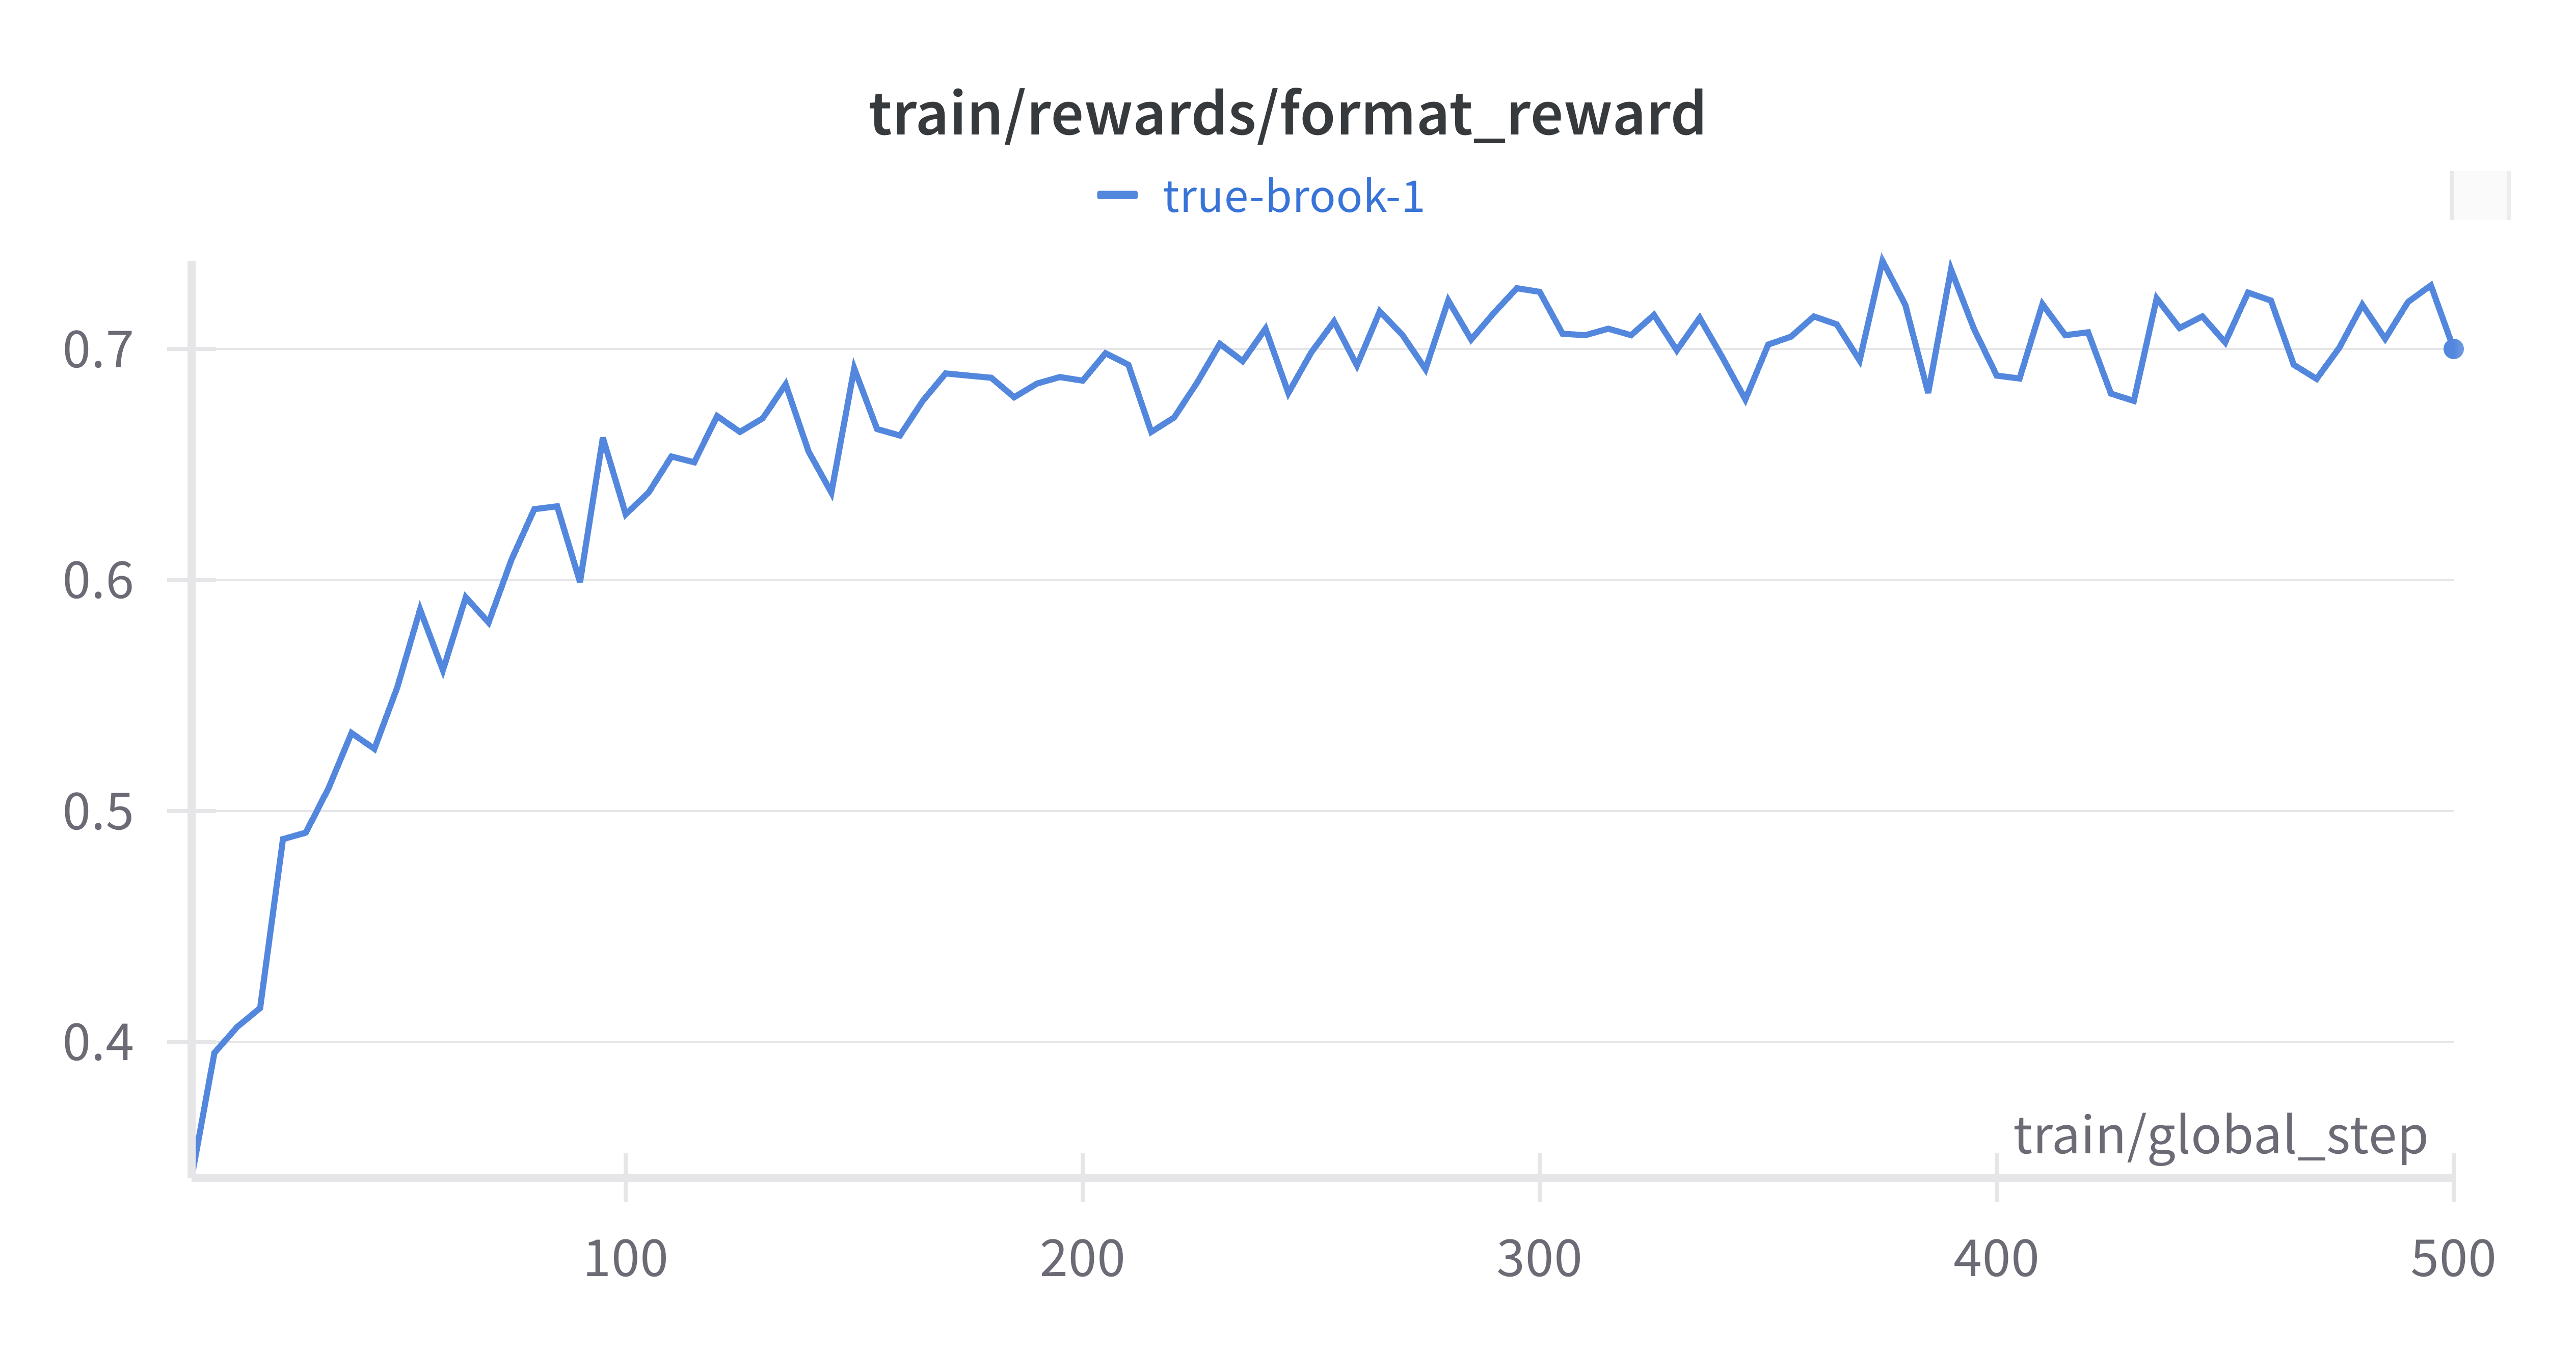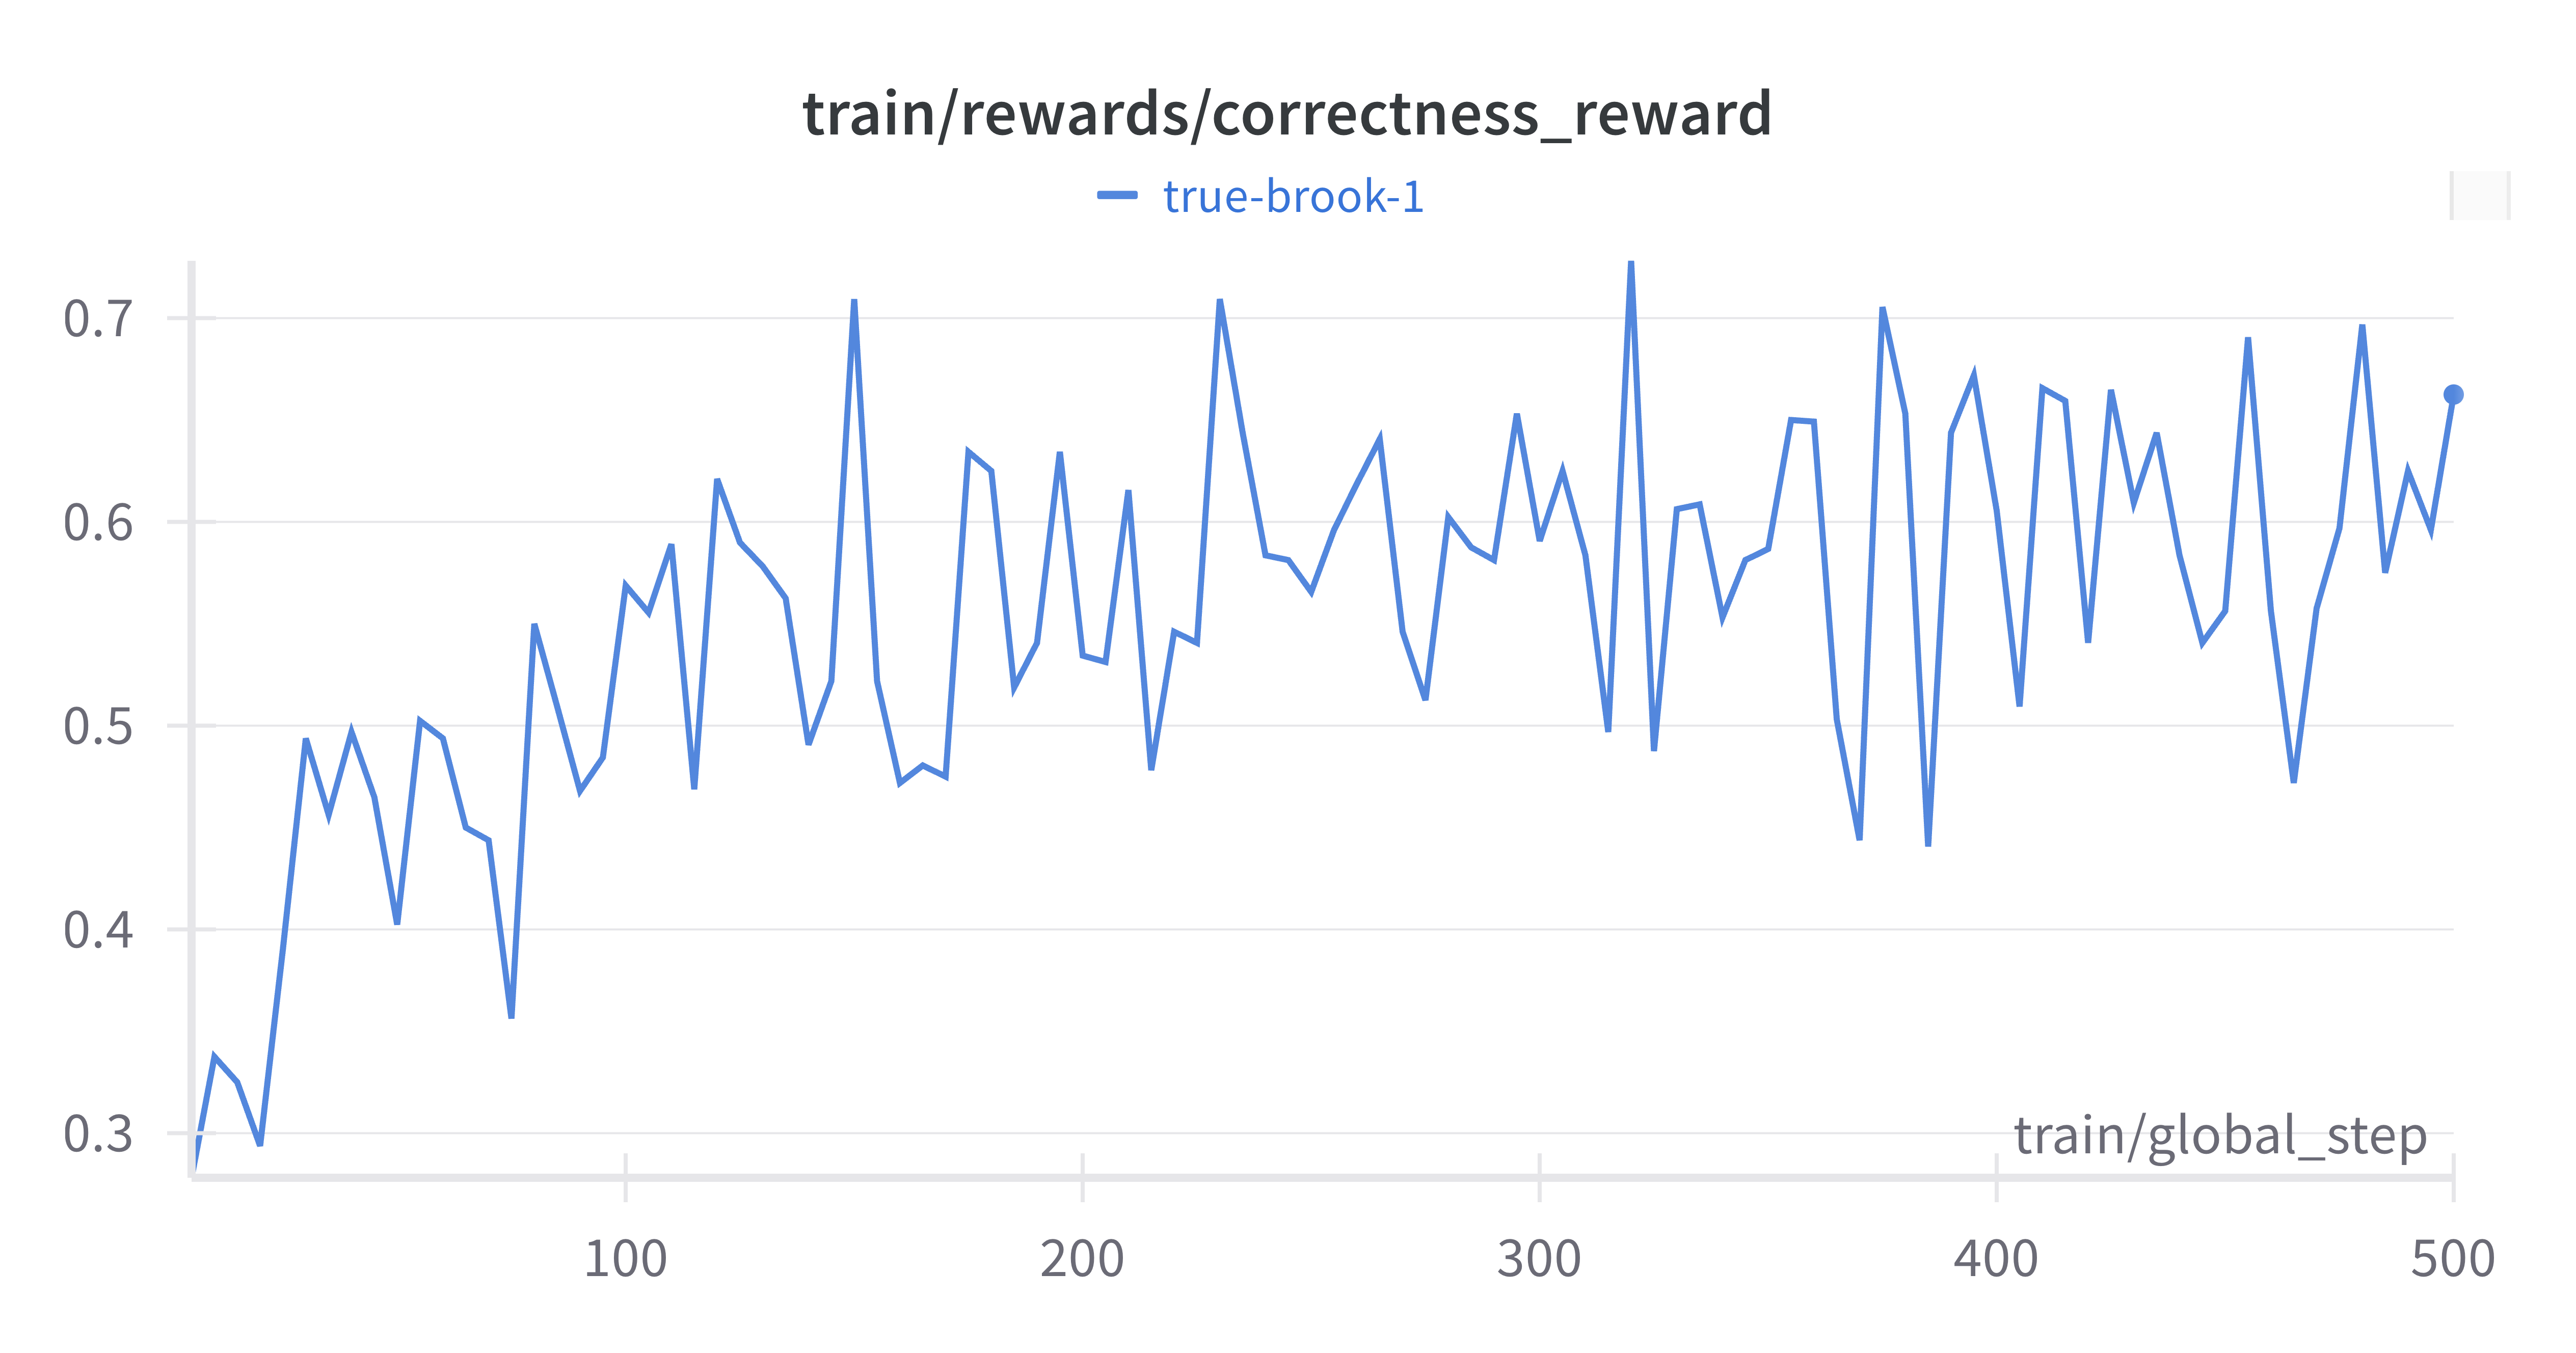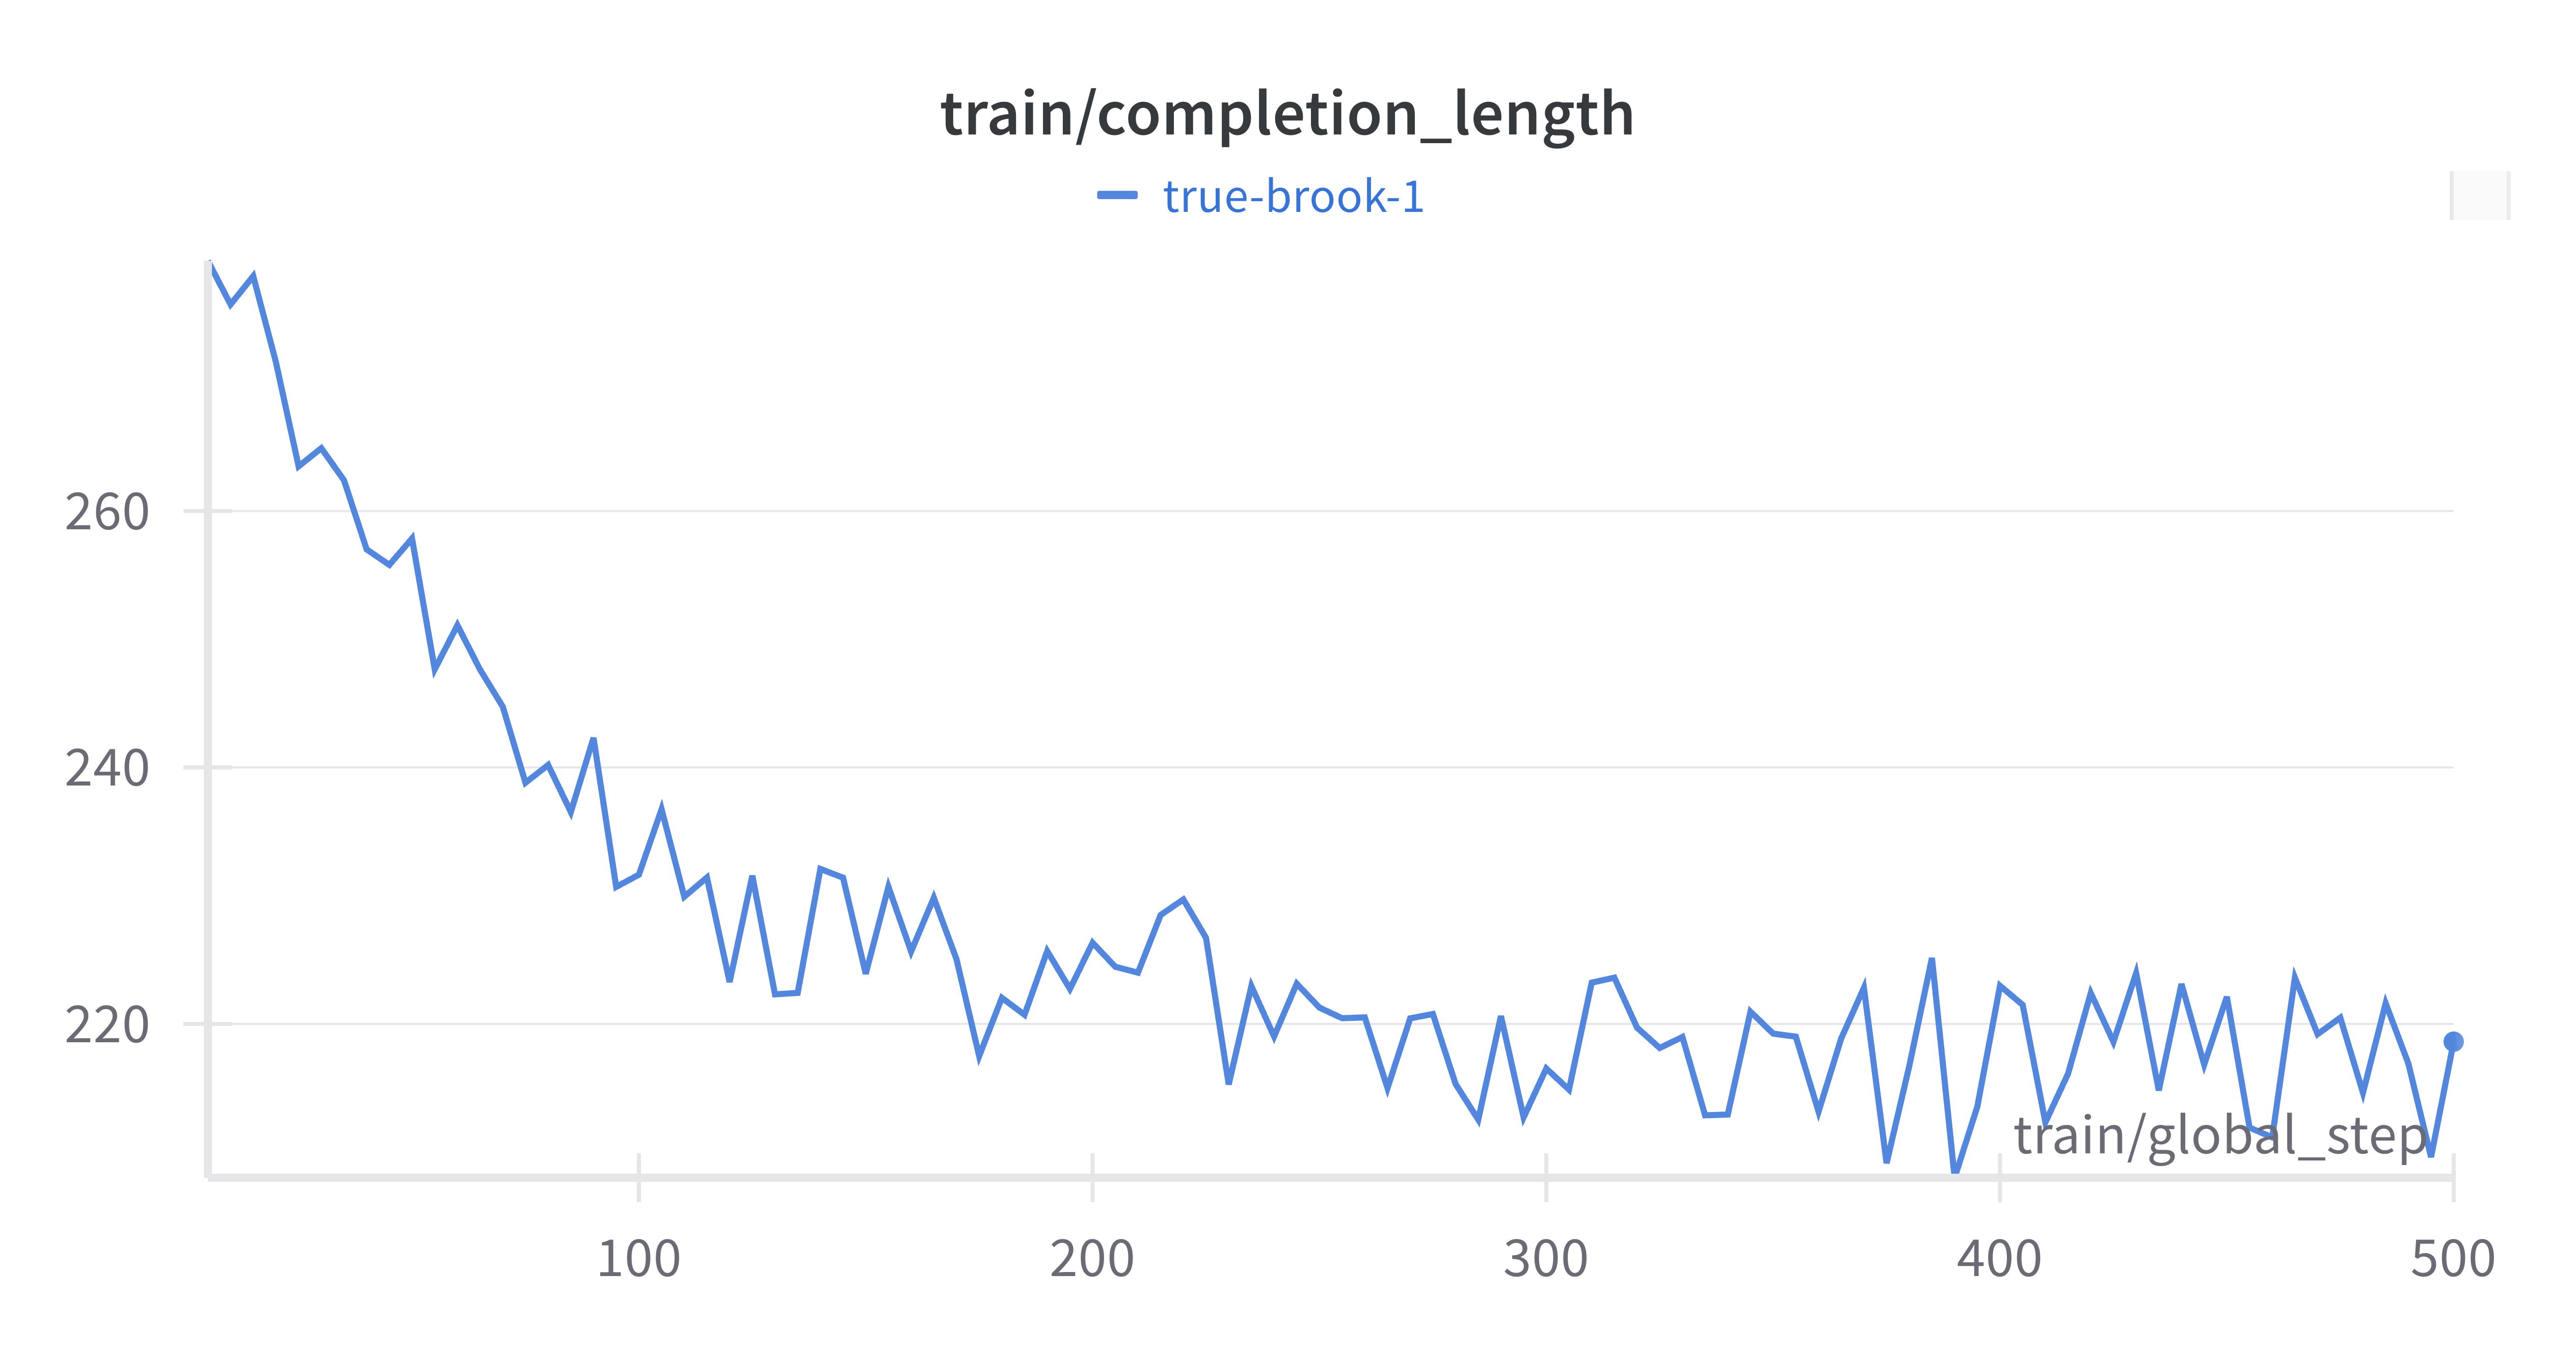


The above graphs show that the model learns: the average reward for using `<reasoning>` and `<answer>` almost reached the maximum of 0.8. The average reward for putting the correct answers into the `<answer>` tag plateaued around 0.6, which is low, compared to the maximum of 2.0. This can be explained by the small size of our model and a very low allowed response length we used (300). As you can see friom the last plot, the model learned to play safe and to generate responses of about 200 tokens so that it gets the formatting rewards as frequently as possible, but this plays against getting the correct answer.

Using a larger model and allowing for much longer generations will increase the model's ability to learn to generate the correct answers more often.

In [19]:
###########################
# Step 4. LOAD AND TEST MODEL  #
###########################

from transformers import AutoTokenizer, AutoModelForCausalLM

def main():

    # Determine the device: use GPU if available, else fallback to CPU.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load the saved model and tokenizer
    saved_model_path = "IT_Issue_Resolution_grpo_model_0.5_v3"
    loaded_model = AutoModelForCausalLM.from_pretrained(saved_model_path, torch_dtype=torch.bfloat16, device_map="auto")
    loaded_model = loaded_model.to(device)
    loaded_tokenizer = AutoTokenizer.from_pretrained(saved_model_path)
    loaded_tokenizer.pad_token = loaded_tokenizer.eos_token

    prompts_to_test = [
        #"Server backup taking too long to complete."#,
        #"Software installation fails repeatedly on multiple PCs.",
        "Users report audio issues during video conferences."
    ]

    for prompt in prompts_to_test:
        # Prepare the prompt using the chat format supported by the Qwen model.
        test_messages = [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": prompt}
        ]
        test_prompt = build_prompt(test_messages)

        # Tokenize the prompt and generate a response.
        test_input_ids = loaded_tokenizer.encode(test_prompt, return_tensors="pt").to(device)
        test_output_ids = loaded_model.generate(
            test_input_ids,
            max_length=100,
            temperature=1.0,
            num_return_sequences=1
        )
        test_response = loaded_tokenizer.decode(test_output_ids[0], skip_special_tokens=True)

        # Print the test prompt and the model's response.
        print("\nTest Prompt:")
        print(test_prompt)
        print("\nModel Response:")
        print(test_response)

if __name__ == "__main__":
    main()

Using device: cuda

Test Prompt:
Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
Users report audio issues during video conferences.

Model Response:
Respond in the following format:

<reasoning>
...
</reasoning>
<answer>
...
</answer>
Users report audio issues during video conferences. <reasoning>
Alright, we have an issue: Users report audio issues during video conferences. Let me first try accessing the affected server `WEB-SRV01`..
Connected to `WEB-SRV01`. Now, let me check if the `redis` service is running..
Running `systemctl status redis`.. Hmm, I don


In [ ]:
###########################
# Step 4. LOAD AND TEST MODEL  #
###########################

from transformers import AutoTokenizer, AutoModelForCausalLM

def main():

    # Determine the device: use GPU if available, else fallback to CPU.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load the saved model and tokenizer
    saved_model_path = "IT_Issue_Resolution_grpo_model_0.5_v2"
    loaded_model = AutoModelForCausalLM.from_pretrained(saved_model_path, torch_dtype=torch.bfloat16, device_map="auto")
    loaded_model = loaded_model.to(device)
    loaded_tokenizer = AutoTokenizer.from_pretrained(saved_model_path)
    loaded_tokenizer.pad_token = loaded_tokenizer.eos_token

    prompts_to_test = [
        "If a person walks at 14 km/hr instead of 10 km/hr, he would have walked 20 km more. The actual distance travelled by him is:?"
            ]

    for prompt in prompts_to_test:
        # Prepare the prompt using the chat format supported by the Qwen model.
        test_messages = [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": prompt}
        ]
        test_prompt = build_prompt(test_messages)

        # Tokenize the prompt and generate a response.
        test_input_ids = loaded_tokenizer.encode(test_prompt, return_tensors="pt").to(device)
        test_output_ids = loaded_model.generate(
            test_input_ids,
            max_length=512,
            temperature=1.0,
            num_return_sequences=1
        )
        test_response = loaded_tokenizer.decode(test_output_ids[0], skip_special_tokens=True)

        # Print the test prompt and the model's response.
        print("\nTest Prompt:")
        print(test_prompt)
        print("\nModel Response:")
        print(test_response)

if __name__ == "__main__":
    main()

Using device: cuda


In [22]:
!pip freeze >> GRPO_Qwen_0_5_Instruct_working_req.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [134]:
# Import the necessary libraries
from bert_score import BERTScorer
    
# Initialize the BERTScorer object
scorer = BERTScorer(lang='en')
    
# Define the reference and candidate sentences
reference = ["This is a test sentence"]
candidate = [" blah blah"]
    
# Compute the BERTScore
P, R, F1 = scorer.score(candidate, reference)
    
# Print the scores
print("Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(P.item(), R.item(), F1.item()))


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.82, Recall: 0.84, F1: 0.83


In [136]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [18]:
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello world"]
references = ["hello world"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
print(results)
# Extract F1 score up to 2 decimal places
# Extract the F1 score and round it to two decimal places
f1_score = round(results['f1'][0], 2)
print("Extracted F1 Score:", f1_score)

{'precision': [0.9999999403953552], 'recall': [0.9999999403953552], 'f1': [0.9999999403953552], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.49.0)'}
Extracted F1 Score: 1.0


This is the end of the tutorial. At this moment, you should have a clear understanding of the components required to build an RL pipeline for finetuning a language model for math, coding, and logic tasks.

<div style="display: flex; justify-content: center;">
    <div style="background-color: #f4f6f7; padding: 15px; width: 80%;">
        <table style="width: 100%">
            <tr>
                <td style="vertical-align: middle;">
                    <span style="font-size: 14px;">
                        This was an extension notebook for <a href="https://www.thelmbook.com" target="_blank" rel="noopener">The Hundred-Page Language Models Book</a> by Andriy Burkov<br><br>
                        Code repository: <a href="https://github.com/aburkov/theLMbook" target="_blank" rel="noopener">https://github.com/aburkov/theLMbook</a>
                        <br><br>
                        <a href="https://www.thelmbook.com" target="_blank" rel="noopener">Read the book</a> to learn about language modeling and train yours from scratch.
                    </span>
                </td>
                <td style="vertical-align: middle;">
                    <a href="https://www.thelmbook.com" target="_blank" rel="noopener">
                        <img src="https://thelmbook.com/img/book.png" width="80px" alt="The Hundred-Page Language Models Book">
                    </a>
                </td>
            </tr>
        </table>
    </div>
</div>